# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`




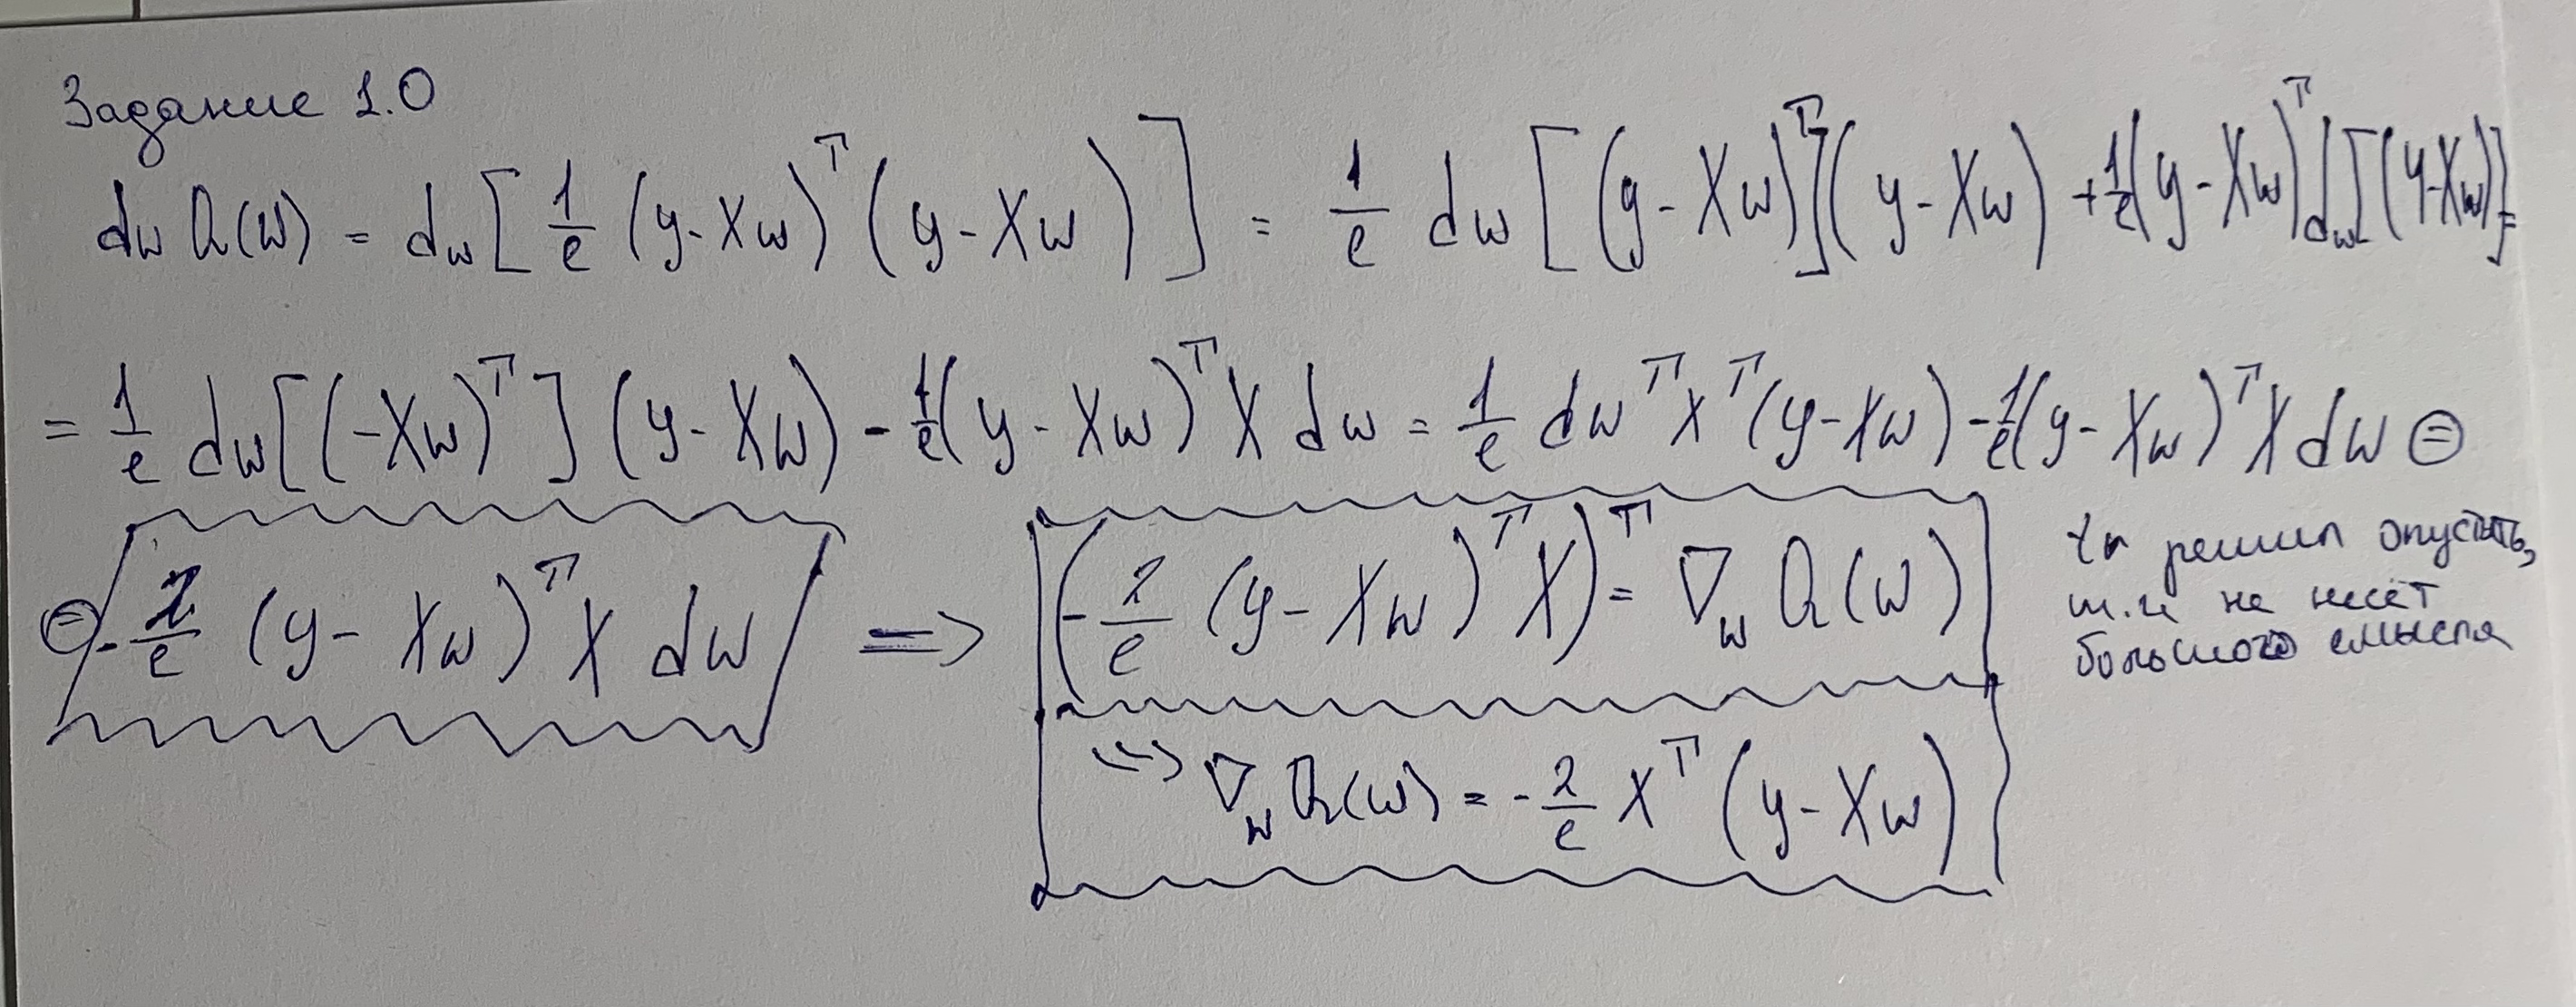

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/96123154/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/96161990/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/96168921/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96171936/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96181513/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [3]:
data = pd.read_csv('autos.csv')

In [5]:





data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths   price  
0     75.0   150000.0          177.0  1500.0  
1     69.0    90000.0           93.0  3600.0  
2    102.0   150000.0          246.0   650.0  
3    109.0   150000.0          140.0  2200.0  
4    105.0   150000.0          136.0  2000.0

In [6]:
data['log_price'] = np.log1p(data['price'])

In [7]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths   price  log_price  
0     75.0   150000.0          177.0  1500.0   7.313887  
1     69.0    90000.0           93.0  3600.0   8.188967  
2    102.0   150000.0          246.0   650.0   6.478510  
3    109.0   150000.0          140.0  2200.0   7.696667  
4    105.0   150000.0          136.0  2000.0   7.601402

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [8]:
data.isna().sum()

brand                0
model                0
vehicleType          1
gearbox              1
fuelType             1
notRepairedDamage    1
powerPS              1
kilometer            1
autoAgeMonths        1
price                1
log_price            1
dtype: int64

In [9]:
data.describe()

powerPS      kilometer  autoAgeMonths         price     log_price
count  85632.000000   85632.000000   85632.000000  85632.000000  85632.000000
mean     131.375689  123577.692919     144.518509   6915.316541      8.271170
std       60.929405   39916.194733      73.118386   8053.682343      1.148403
min       51.000000    5000.000000       1.000000      1.000000      0.693147
25%       90.000000  100000.000000      91.000000   1798.750000      7.495403
50%      118.000000  150000.000000     140.000000   4100.000000      8.318986
75%      160.000000  150000.000000     192.000000   8999.000000      9.104980
max      587.000000  150000.000000     600.000000  99990.000000     11.512835

In [10]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS              float64
kilometer            float64
autoAgeMonths        float64
price                float64
log_price            float64
dtype: object

In [11]:
data.shape

(85633, 11)

<Axes: title={'center': 'Распределение целевого значения в столбце price'}, xlabel='price', ylabel='Count'>

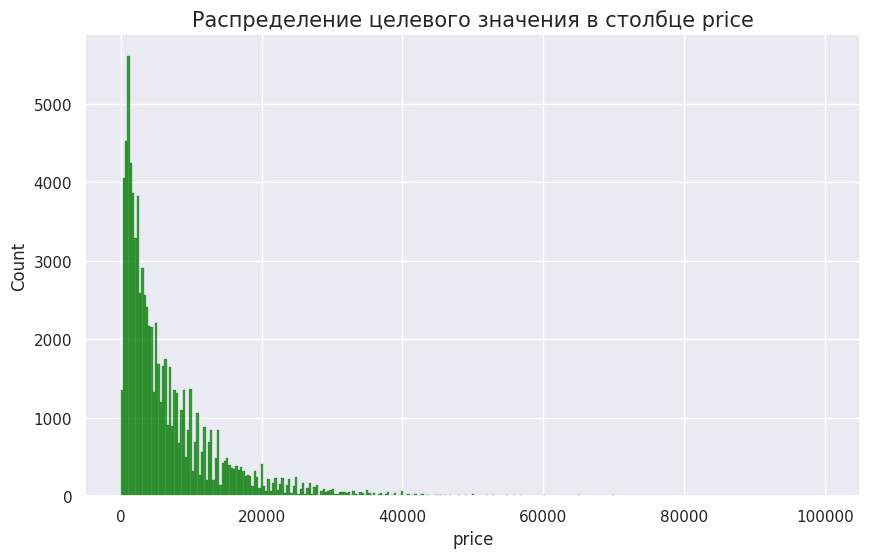

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Распределение целевого значения в столбце price', fontsize=15)
sns.histplot(data=data,
             x='price',
             ax=ax,
             color='green',
             edgecolor='darkgreen')

****
**Да, в данных есть выбросы, их мы удалим! А также удобнее анализировать логирифм предоставленного таргета, потому что у нас есть 'положительный' длинный хвост завышенных цен на тачки!**\
Ну а для оптимиации это не имеет значения(эквивалентно)!
****

In [13]:
# Проверка наличия выбросов
q1 = data['price'].quantile(0.25)
q2 = data['price'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr

# Удаление выбросов
data_price = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

<Axes: title={'center': 'Распределение целевого значения в столбце price без выбросов'}, xlabel='price', ylabel='Count'>

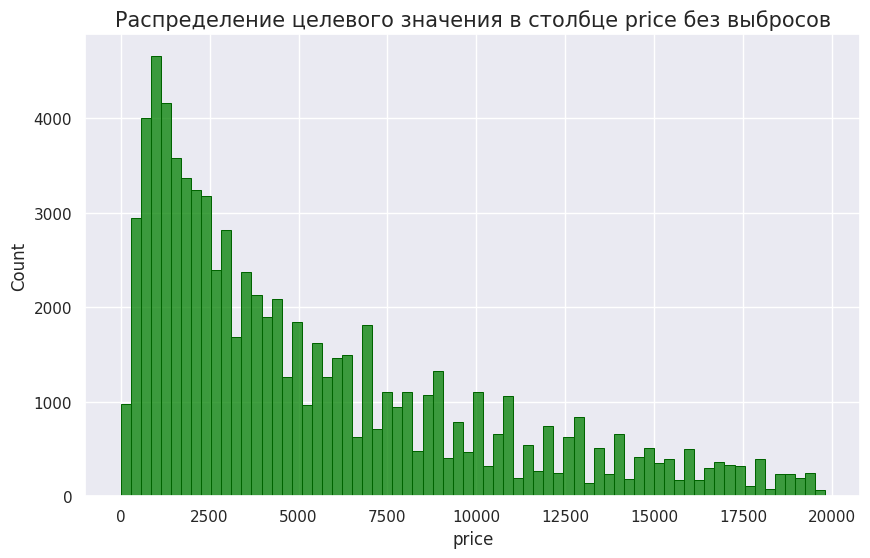

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Распределение целевого значения в столбце price без выбросов', fontsize=15)
sns.histplot(data=data_price,
             x='price',
             ax=ax,
             color='green',
             edgecolor='darkgreen')

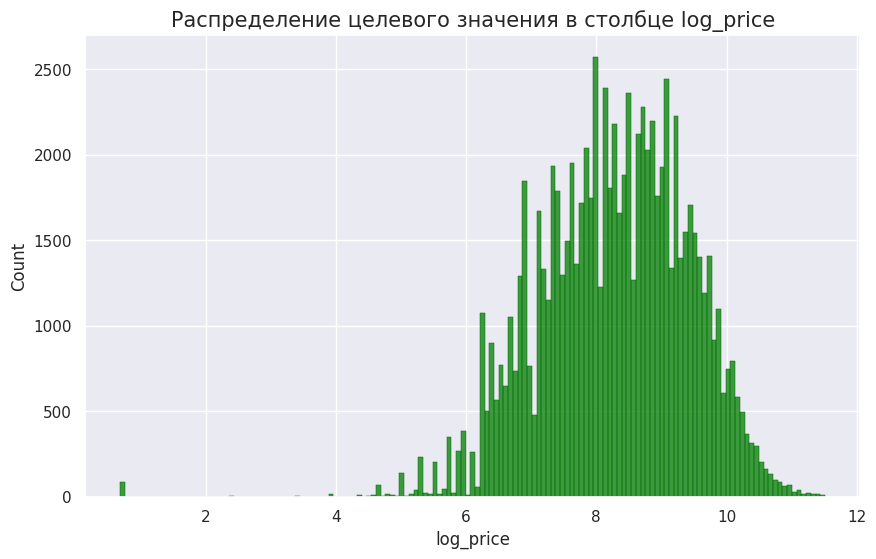

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Распределение целевого значения в столбце log_price', fontsize=15)

sns.histplot(data=data,
             x='log_price',
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [16]:
# Проверка наличия выбросов
q1 = data['log_price'].quantile(0.25)
q2 = data['log_price'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr

# Удаление выбросов
data_log_price = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

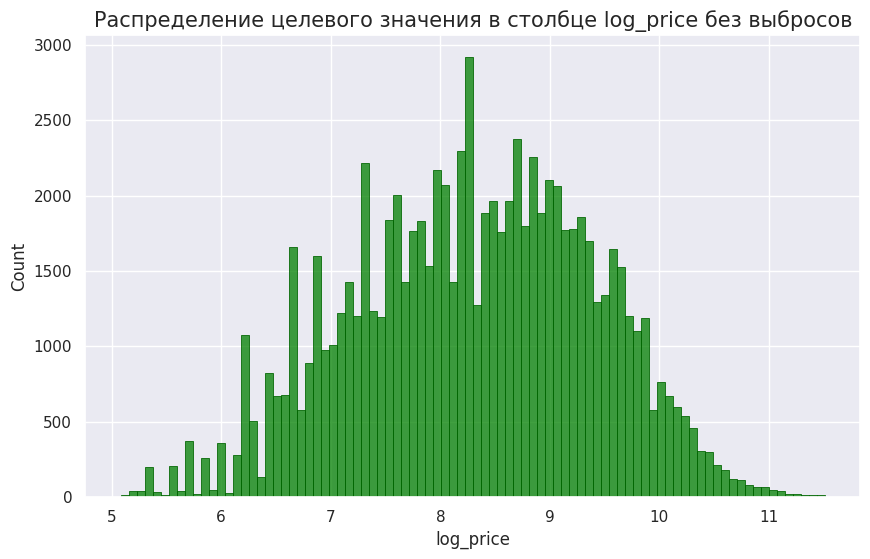

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Распределение целевого значения в столбце log_price без выбросов', fontsize=15)

sns.histplot(data=data_log_price,
             x='log_price',
             ax=ax,
             color='green',
             edgecolor='darkgreen');

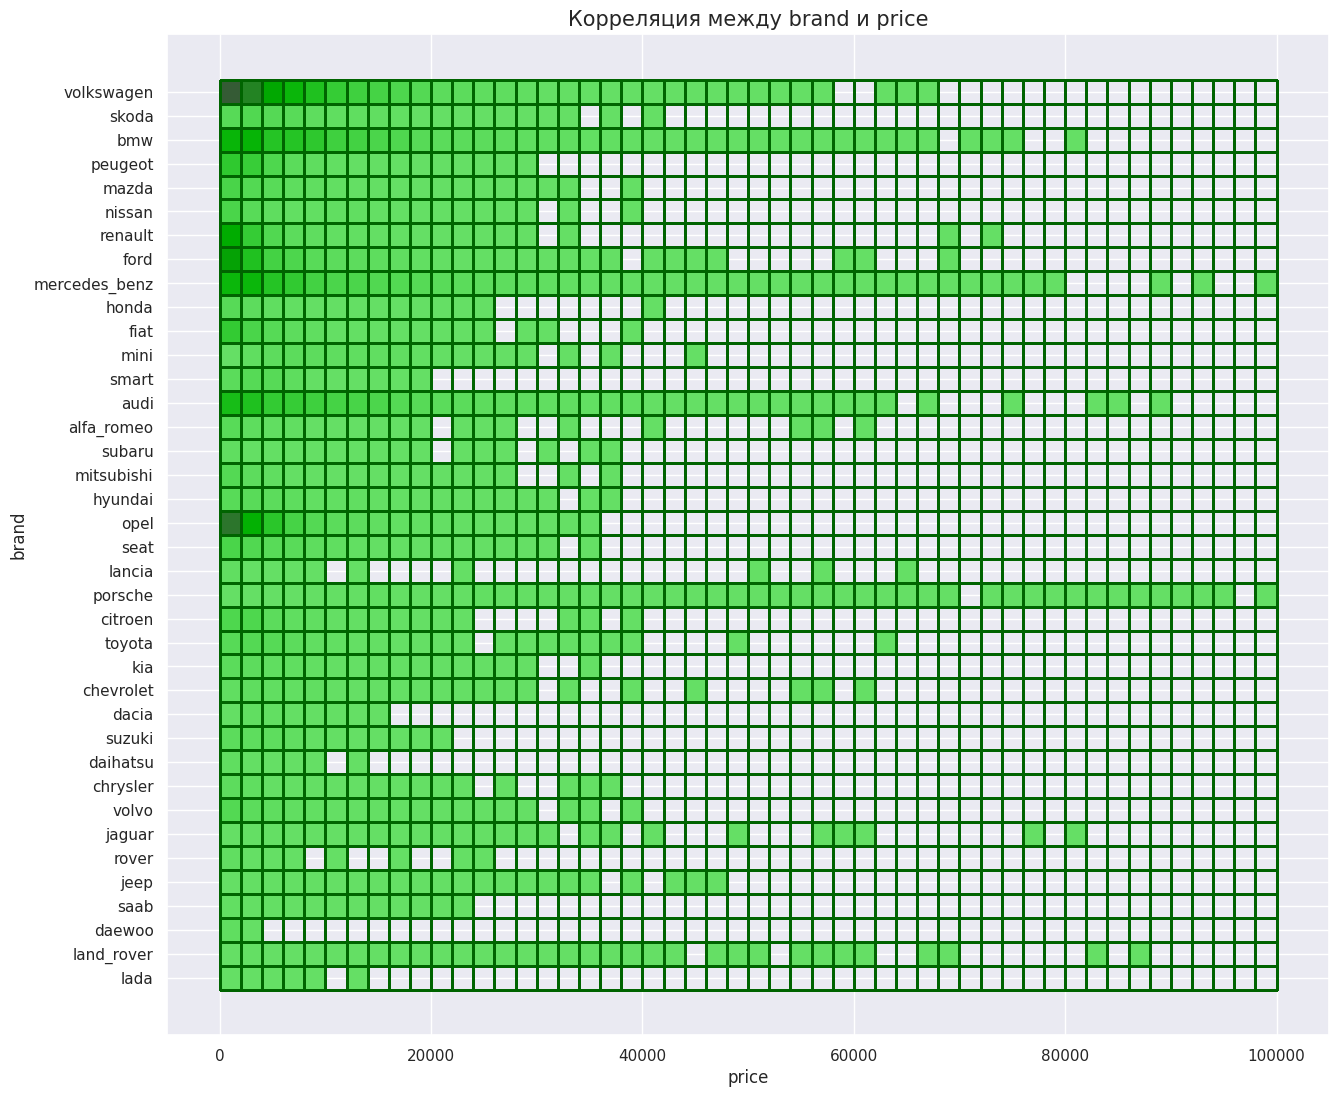

In [18]:
fig, ax = plt.subplots(figsize=(15, 13))
ax.set_title('Корреляция между brand и price', fontsize=15)

sns.histplot(data=data,
             y='brand',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [19]:
(data['brand'].values == '').sum()

0

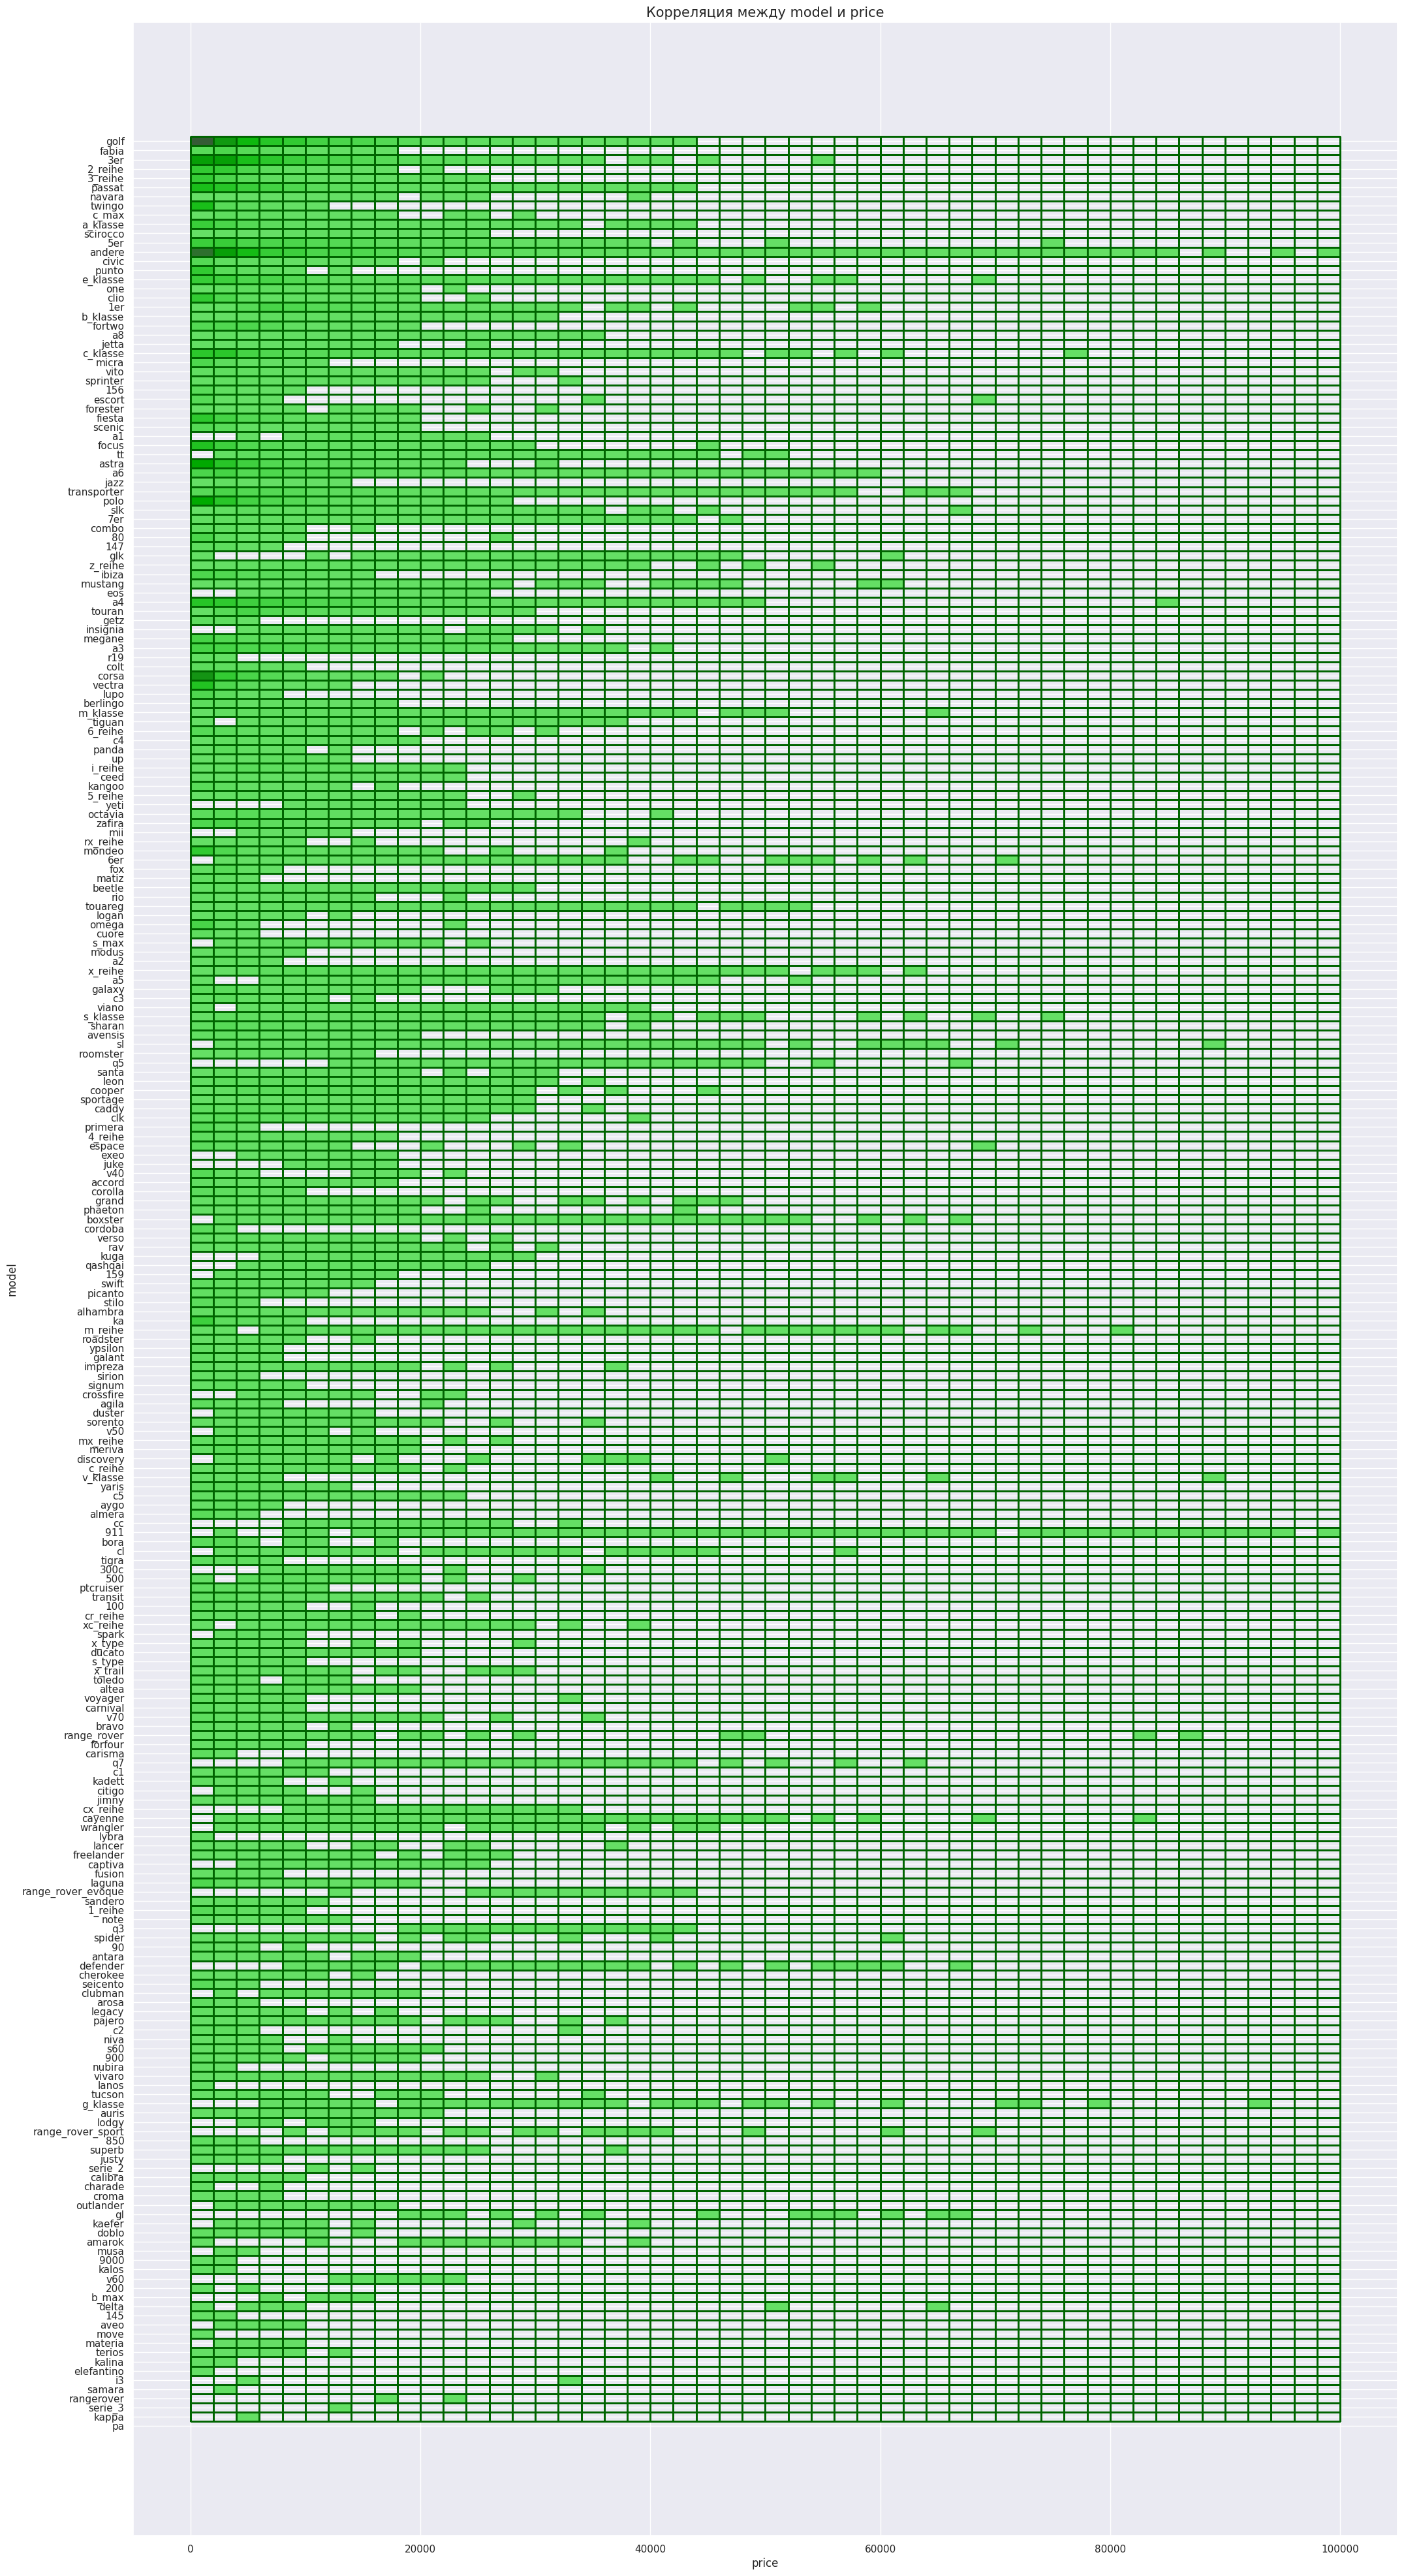

In [20]:
fig, ax = plt.subplots(figsize=(25, 50))
ax.set_title('Корреляция между model и price', fontsize=15)

sns.histplot(data=data,
             y='model',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [21]:
(data['model'].values == '').sum()

0

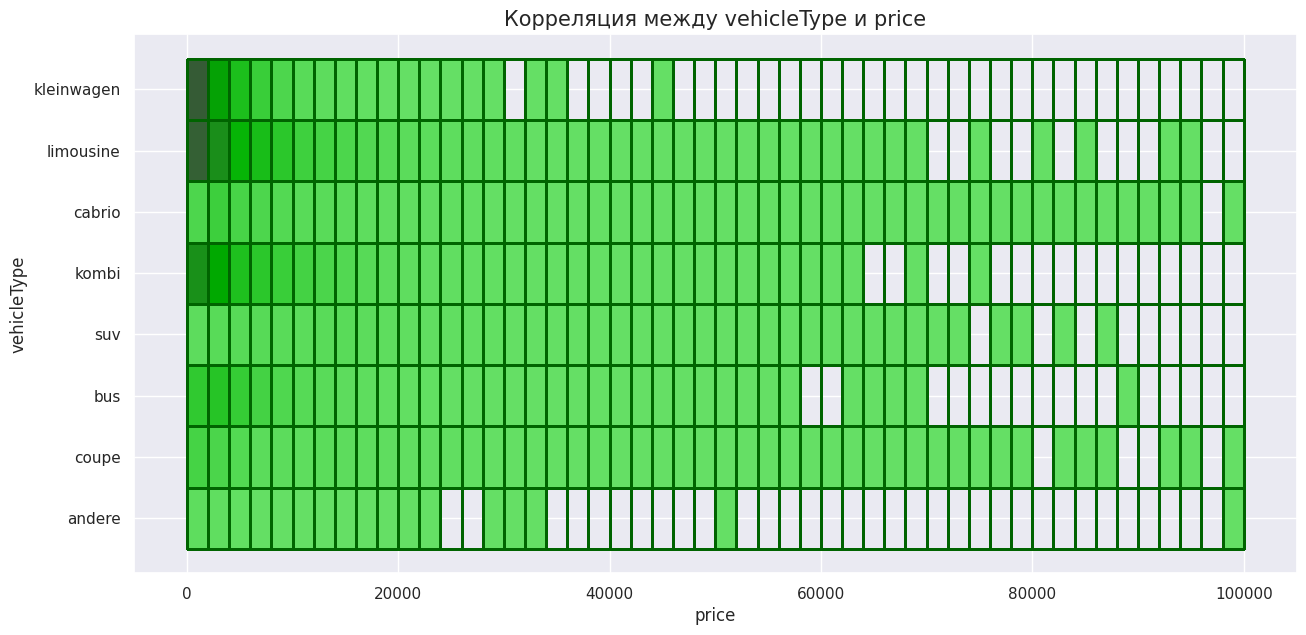

In [22]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между vehicleType и price', fontsize=15)

sns.histplot(data=data,
             y='vehicleType',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [23]:
(data['vehicleType'].values == '').sum()

0

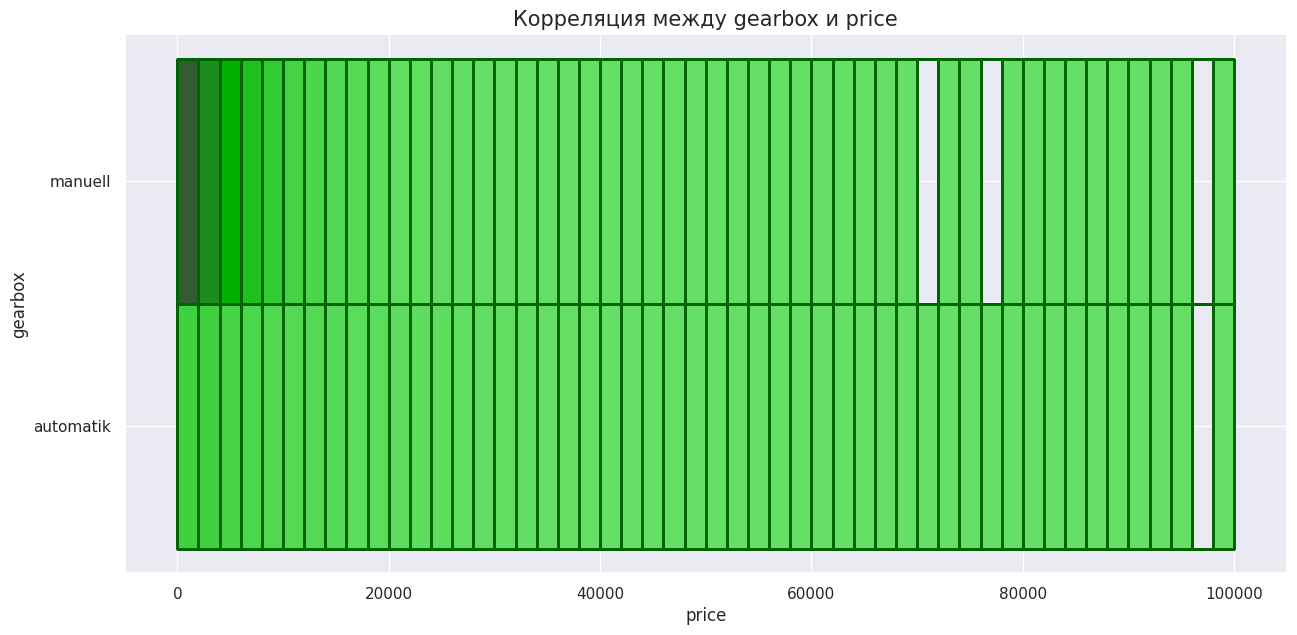

In [24]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между gearbox и price', fontsize=15)

sns.histplot(data=data,
             y='gearbox',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

<Axes: title={'center': 'Выбросы gearbox относительно price'}, xlabel='gearbox', ylabel='price'>

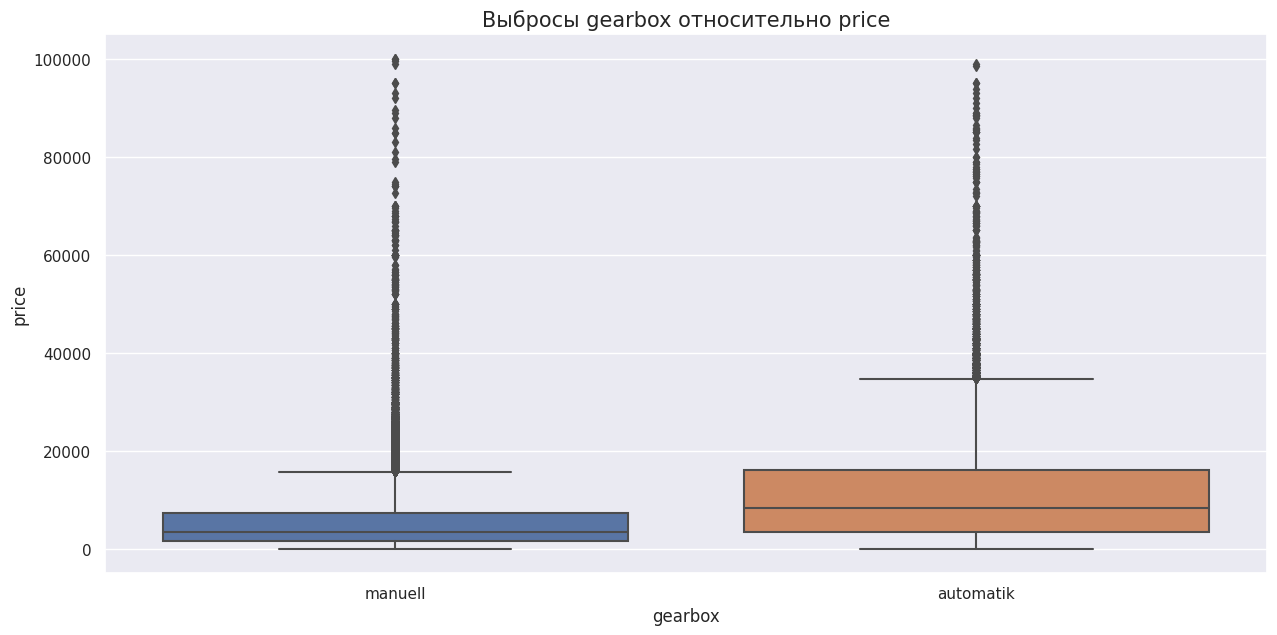

In [25]:
# Посмотрим на потенциальные выбросы
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Выбросы gearbox относительно price', fontsize=15)
sns.boxplot(data=data,
            y='price',
            x='gearbox',
            ax=ax)

In [26]:
(data['gearbox'].values == '').sum()

0

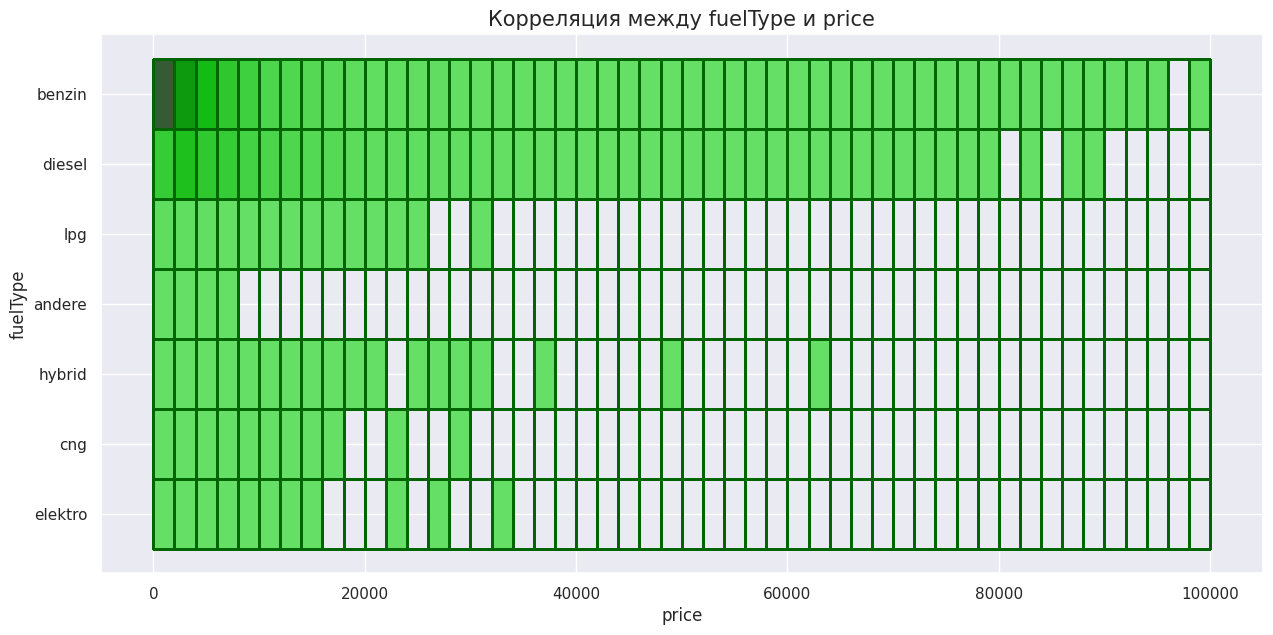

In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между fuelType и price', fontsize=15)

sns.histplot(data=data,
             y='fuelType',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

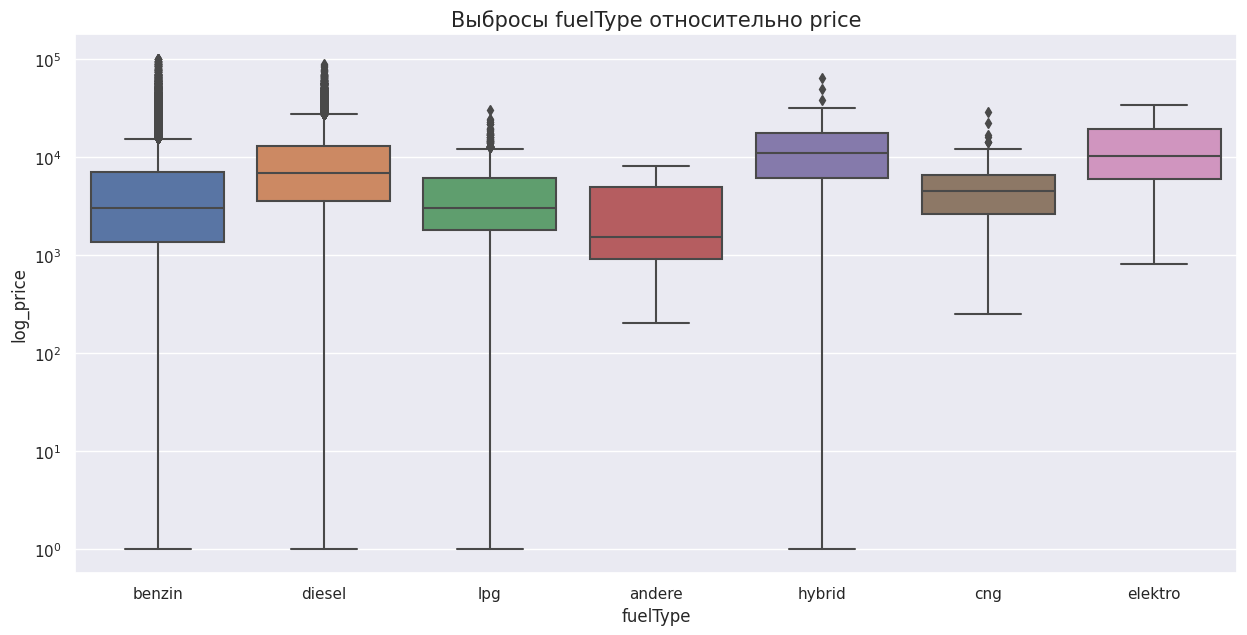

In [28]:
# Посмотрим на потенциальные выбросы
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Выбросы fuelType относительно price', fontsize=15)
sns.boxplot(data=data,
            y='price',
            x='fuelType',
            ax=ax)
plt.ylabel('log_price')
plt.yscale('log')


In [29]:
(data['fuelType'].values == '').sum()

0

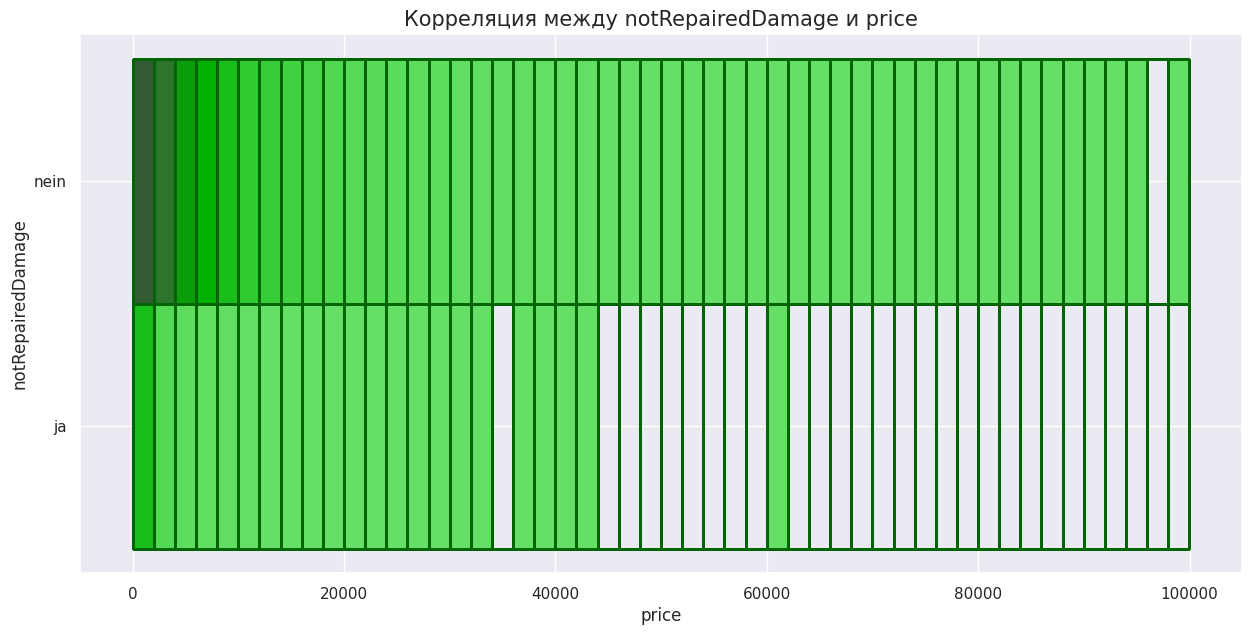

In [30]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между notRepairedDamage и price', fontsize=15)

sns.histplot(data=data,
             y='notRepairedDamage',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

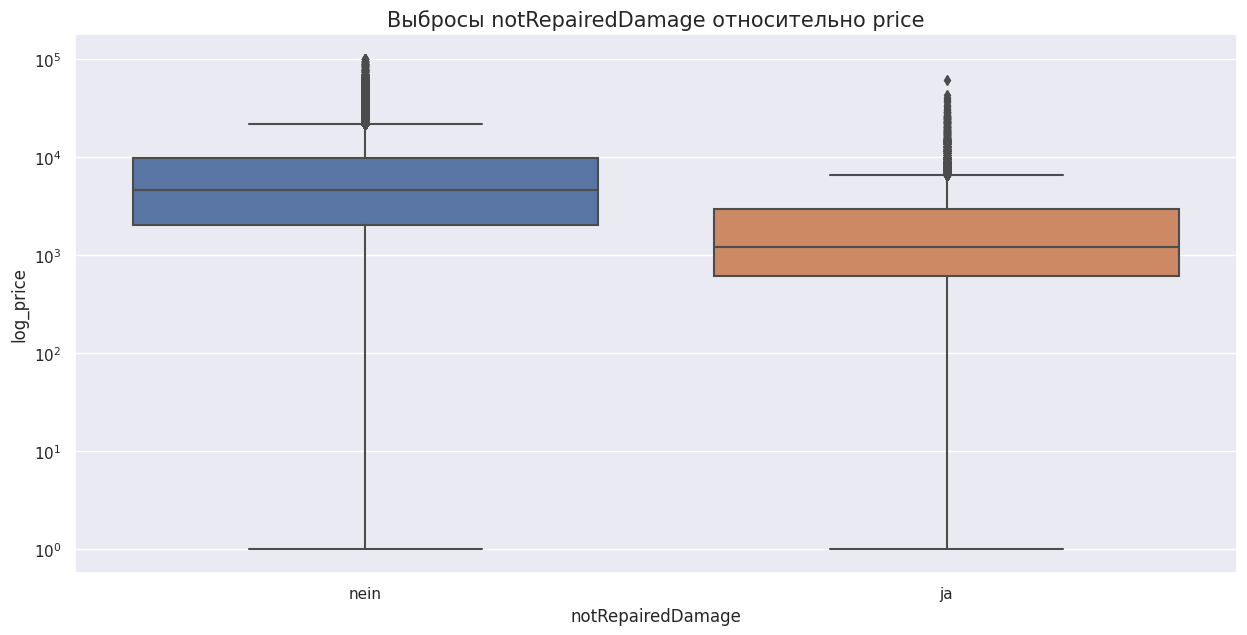

In [31]:
# Посмотрим на потенциальные выбросы
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Выбросы notRepairedDamage относительно price', fontsize=15)
sns.boxplot(data=data,
            y='price',
            x='notRepairedDamage',
            ax=ax)
plt.ylabel('log_price')
plt.yscale('log')

In [32]:
(data['notRepairedDamage'].values == '').sum()

0

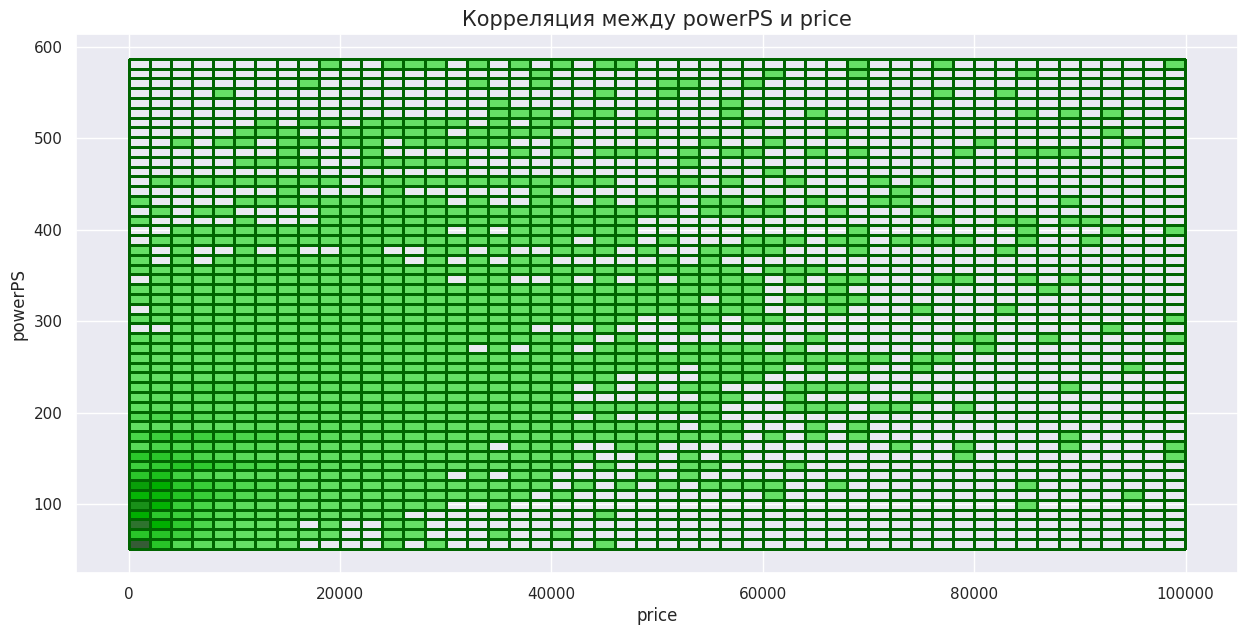

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между powerPS и price', fontsize=15)

sns.histplot(data=data,
             y='powerPS',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [34]:
(data['powerPS'].values <= 70).sum()

10240

In [35]:
# Проверка наличия выбросов
q1 = data['powerPS'].quantile(0.05)
q3 = data['powerPS'].quantile(0.95)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Удаление выбросов
data_powerPS = data[(data['powerPS'] >= lower_bound) & (data['powerPS'] <= upper_bound)]

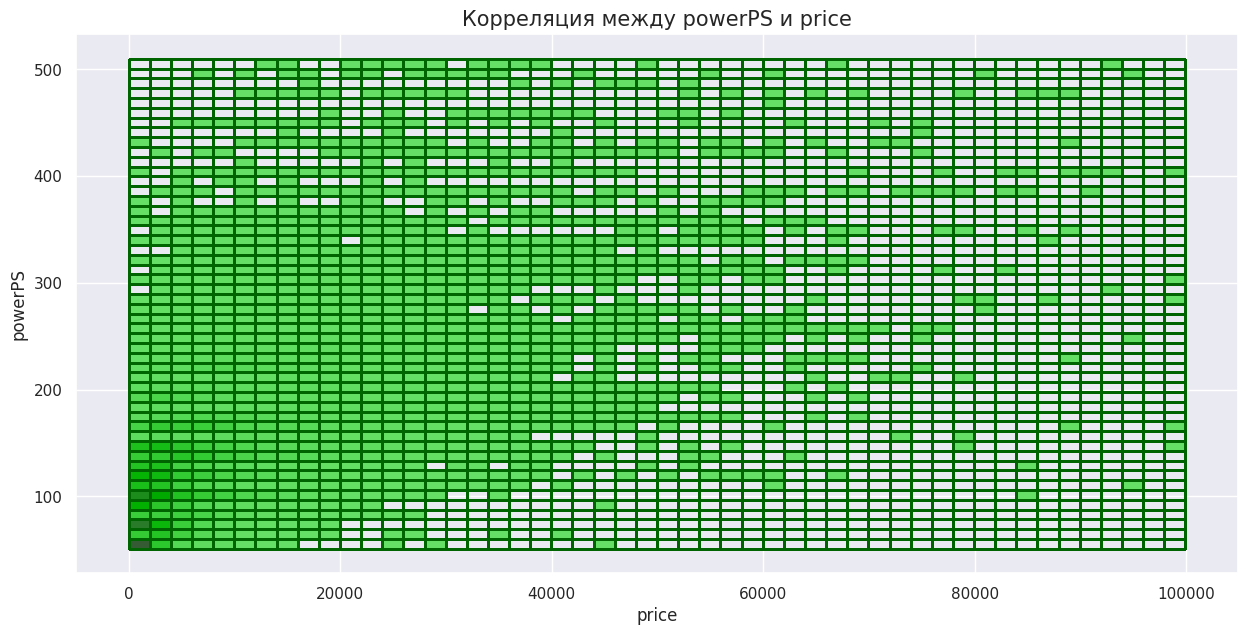

In [36]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между powerPS и price', fontsize=15)

sns.histplot(data=data_powerPS,
             y='powerPS',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

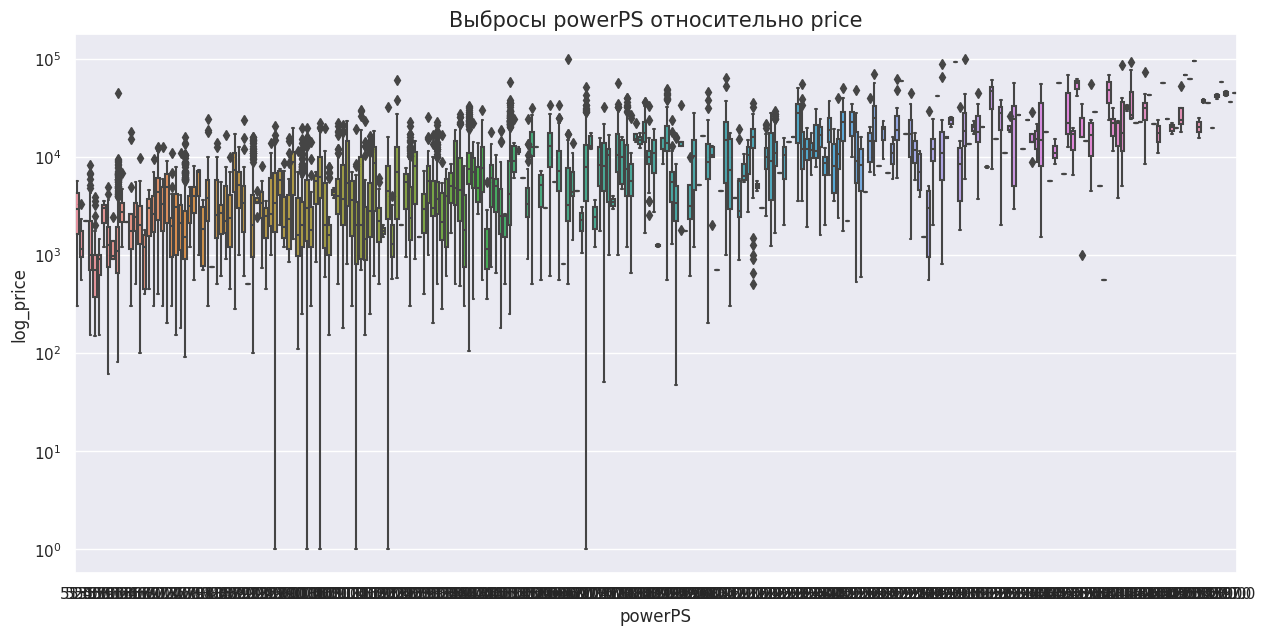

In [37]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Выбросы powerPS относительно price', fontsize=15)
sns.boxplot(data=data.sample(10000),
            y='price',
            x='powerPS',
            ax=ax)
plt.ylabel('log_price')
plt.yscale('log')

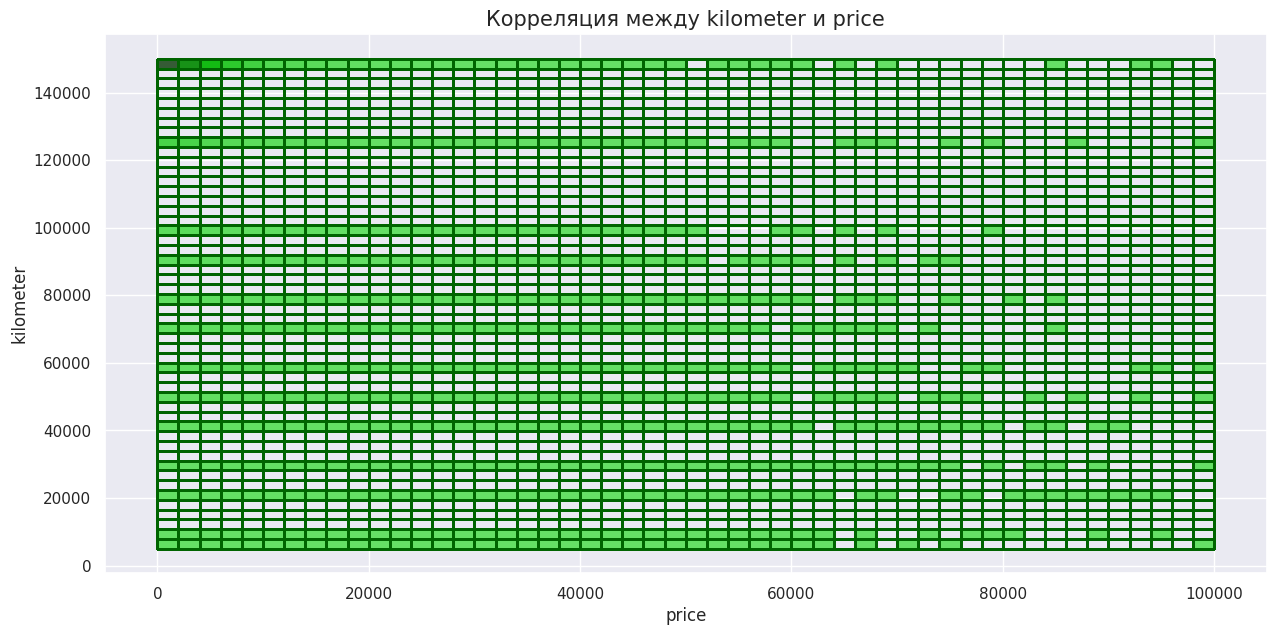

In [38]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между kilometer и price', fontsize=15)

sns.histplot(data=data,
             y='kilometer',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [39]:
(data['kilometer'].values <= 100).sum()

0

In [40]:
# Проверка наличия выбросов
q1 = data['kilometer'].quantile(0.20)
q3 = data['kilometer'].quantile(0.80)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Удаление выбросов
data_kilometer = data[(data['kilometer'] >= lower_bound) & (data['kilometer'] <= upper_bound)]

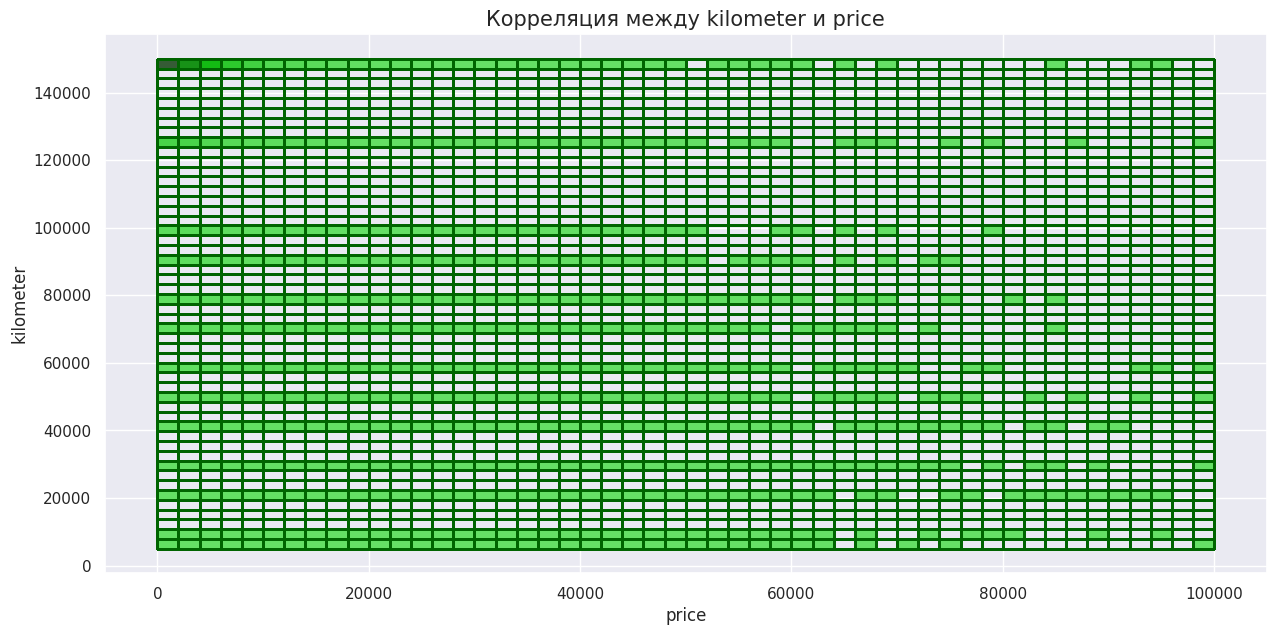

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между kilometer и price', fontsize=15)

sns.histplot(data=data_kilometer,
             y='kilometer',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

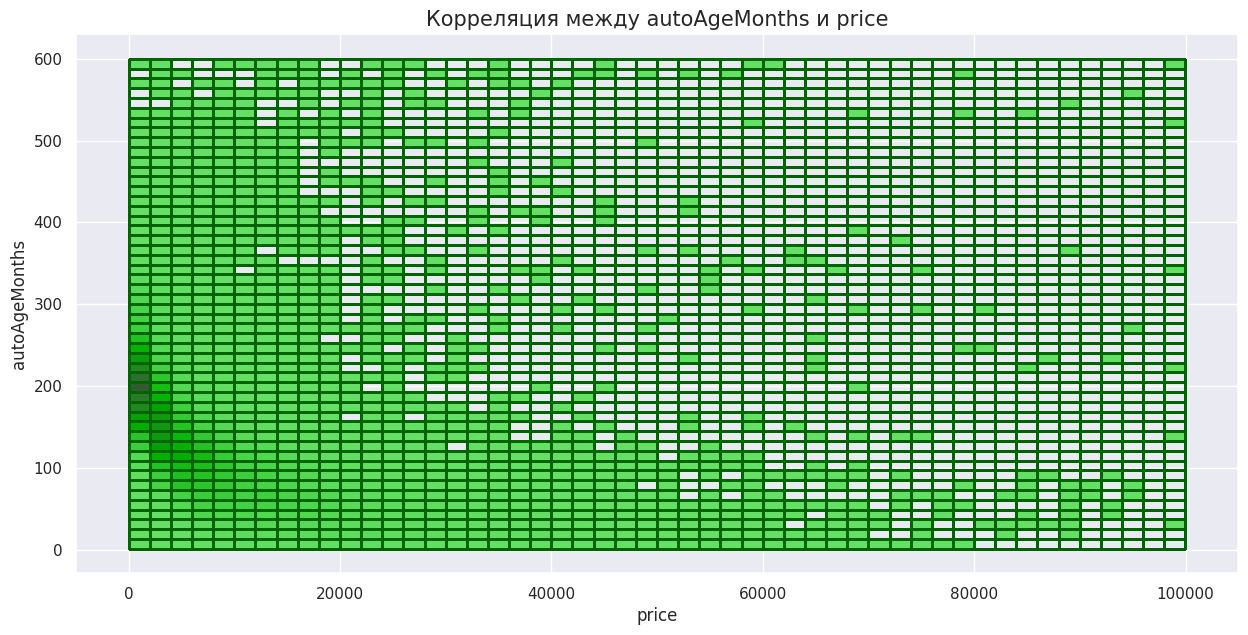

In [42]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между autoAgeMonths и price', fontsize=15)

sns.histplot(data=data,
             y='autoAgeMonths',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

In [43]:
(data['autoAgeMonths'].values <= 100).sum()

25183

In [44]:
# Проверка наличия выбросов
q1 = data['autoAgeMonths'].quantile(0.05)
q3 = data['autoAgeMonths'].quantile(0.95)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Удаление выбросов
data_autoAgeMonths = data[(data['autoAgeMonths'] >= lower_bound) & (data['autoAgeMonths'] <= upper_bound)]

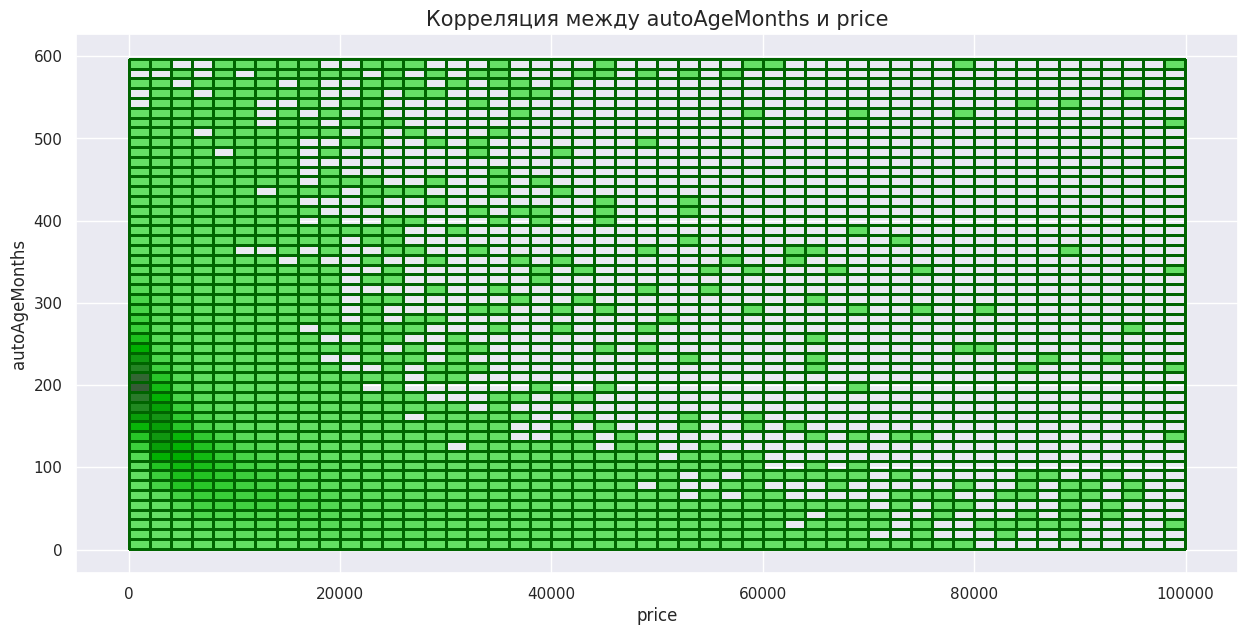

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Корреляция между autoAgeMonths и price', fontsize=15)

sns.histplot(data=data_autoAgeMonths,
             y='autoAgeMonths',
             x='price',
             bins=50,
             ax=ax,
             color='green',
             edgecolor='darkgreen');

Text(0.5, 0, 'autoAgeMonths')

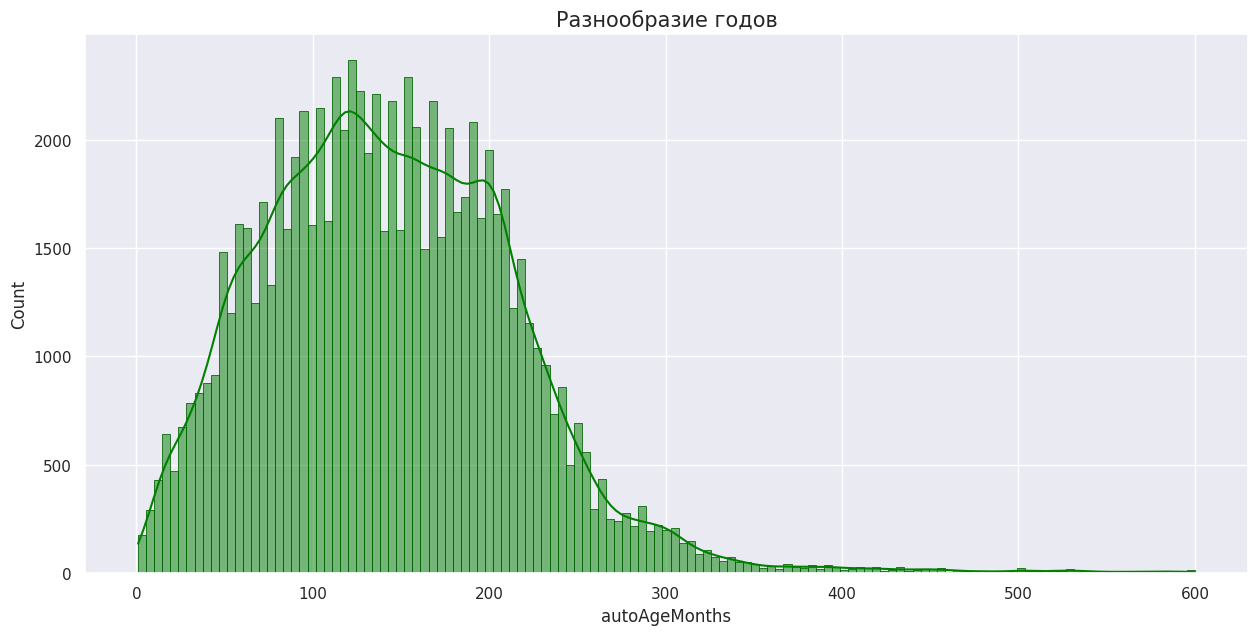

In [46]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Разнообразие годов', fontsize=15)
sns.histplot(data=data['autoAgeMonths'],
             kde=True,
             ax=ax,
             color='green',
             edgecolor='darkgreen')
plt.xlabel('autoAgeMonths')

Text(0.5, 0, 'log_autoAgeMonths')

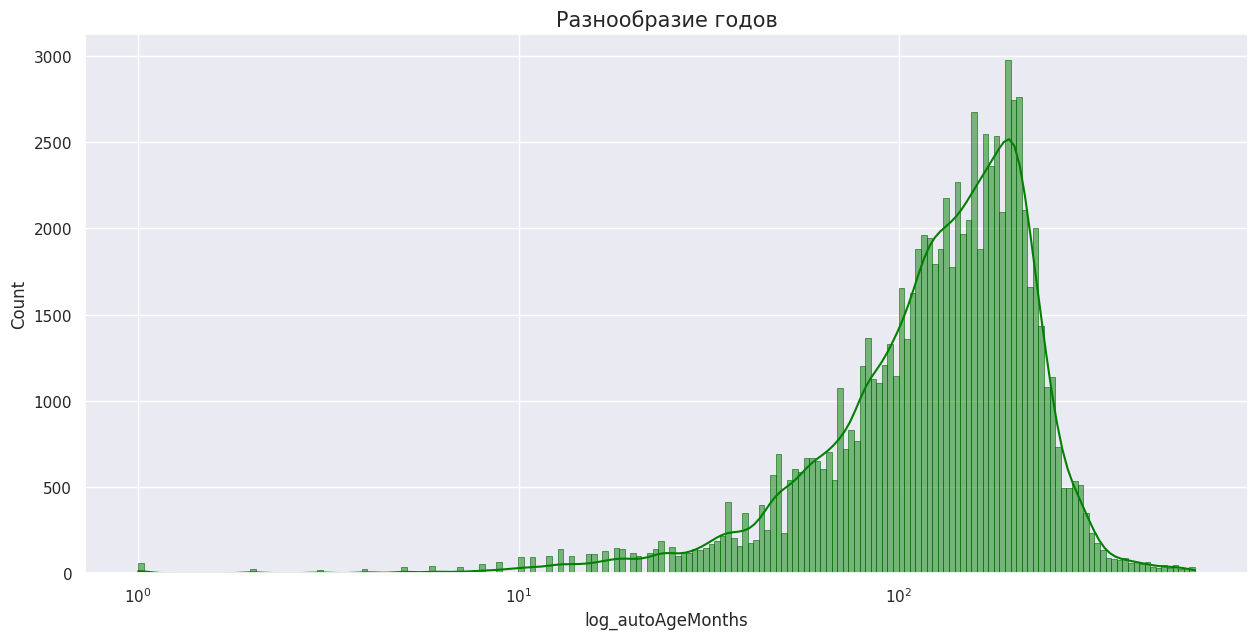

In [47]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Разнообразие годов', fontsize=15)
sns.histplot(data=data['autoAgeMonths'],
             kde=True,
             ax=ax,
             color='green',
             edgecolor='darkgreen',
             log_scale=True)
plt.xlabel('log_autoAgeMonths')

Text(0.5, 1.0, 'Визуализация отношения между autoAgeMonths и price')

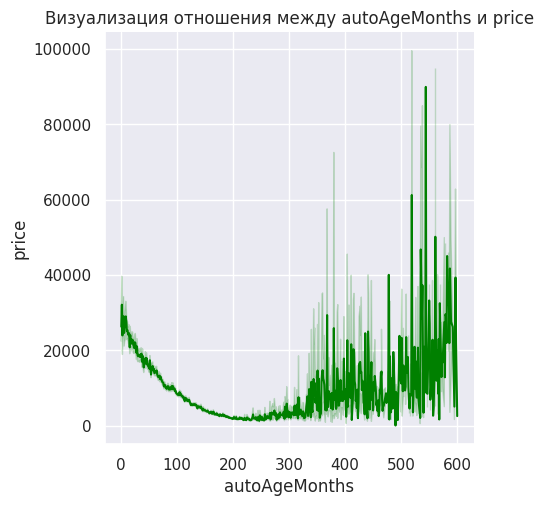

In [48]:
# fig, ax = plt.subplots(figsize=(15, 7))
# ax.set_title('Визуализация отношения между autoAgeMonths и price', fontsize=15)
sns.relplot(data=data,
             kind='line',
             color='green',
             x='autoAgeMonths',
             y='price')
plt.title('Визуализация отношения между autoAgeMonths и price')

Text(0.5, 1.0, 'Визуализация отношения между autoAgeMonths и log_price')

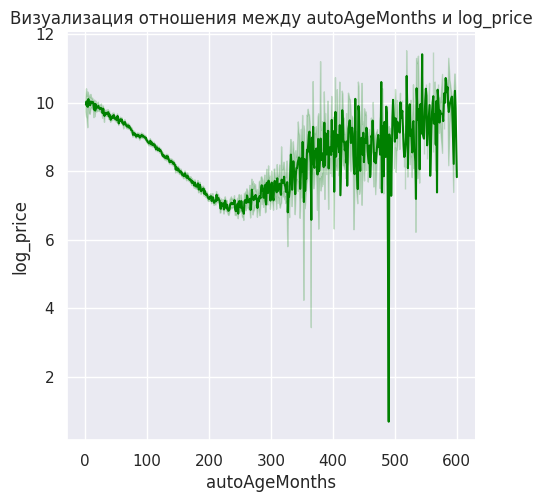

In [49]:
sns.relplot(data=data,
             kind='line',
             color='green',
             x='autoAgeMonths',
             y='log_price')
plt.title('Визуализация отношения между autoAgeMonths и log_price')

In [50]:
data['log_autoAgeMonths'] = np.log1p(data['autoAgeMonths'])

In [51]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths   price  log_price  log_autoAgeMonths  
0     75.0   150000.0          177.0  1500.0   7.313887           5.181784  
1     69.0    90000.0           93.0  3600.0   8.188967           4.543295  
2    102.0   150000.0          246.0   650.0   6.478510           5.509388  
3    109.0   150000.0          140.0  2200.0   7.696667           4.948760  
4    105.0   150000.0          136.0  2000.0   7.601402           4.919981

In [52]:
data.shape

(85633, 12)

Text(0.5, 1.0, 'Визуализация отношения между log_autoAgeMonths и price')

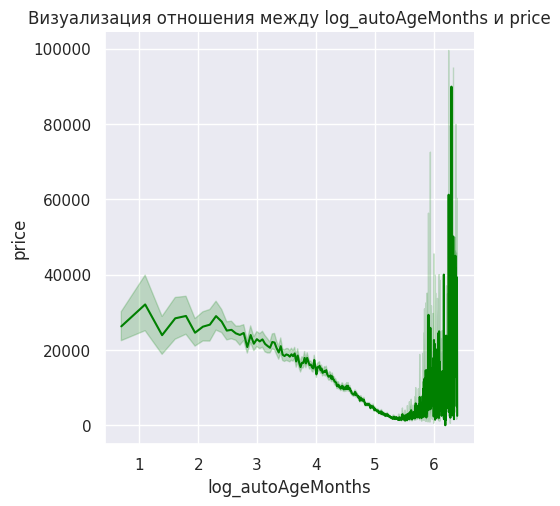

In [53]:
# fig, ax = plt.subplots(figsize=(15, 7))
# ax.set_title('Визуализация отношения между autoAgeMonths и price', fontsize=15)
sns.relplot(data=data,
             kind='line',
             color='green',
             x='log_autoAgeMonths',
             y='price')
plt.title('Визуализация отношения между log_autoAgeMonths и price')

Text(0.5, 1.0, 'Визуализация отношения между log_autoAgeMonths и log_price')

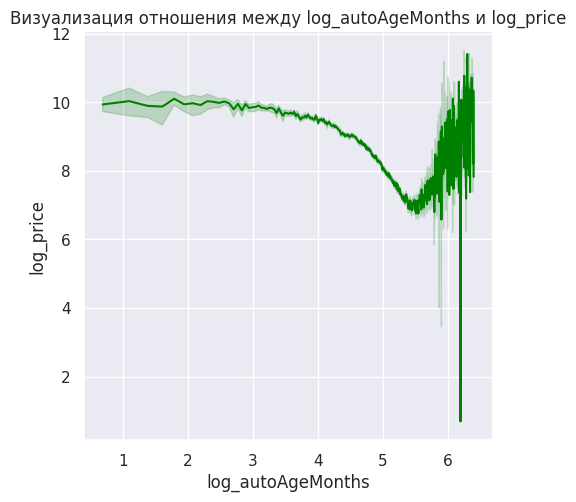

In [54]:
sns.relplot(data=data,
             kind='line',
             color='green',
             x='log_autoAgeMonths',
             y='log_price')
plt.title('Визуализация отношения между log_autoAgeMonths и log_price')

# Парочка мыслей

****

*   Видна корреляция между категориальными признаками и ценой, но она не такая сильная как с вещественными. Среди категориальных себя хорошо показывает модель и марка(model, brand), а среди вещественных лидирует возраст машины
*   Лучше использвать логорифм цены, так как там длинный хвост
*   Есть несбалансированные классы признаков, редкие стоит выкинуть(а еще, если я их не удалю у меня падает ядро, но это не точно)
*   А также нужно подчистить пару выбросов в признаках












****

**Например, было бы неплохо использовать кодирирование наших признаков с учетом целевой переменной, где, допустим, у нас выборка разбивается на несколько фолдов(блоков) и кодируется средним значением!**
Этот подход заключается в кодировании категориальных признаков по 'внутренним' блокам внутри 'внешних' блоков, по которым оценивается качество модели.

А также было бы релевантно юзать зашумление и сглаживание для признаков!

Ну и очевидно, что для категориальных(как и обычно) можно юзать one hot encoder, а все вещественные нужно отмасштабировать с помощью standart scaler!


In [55]:
# Проверка наличия выбросов
q1 = data['log_price'].quantile(0.25)
q2 = data['log_price'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr

# Удаление выбросов
data = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

In [56]:
data.shape

(85240, 12)

In [57]:
# # Проверка наличия выбросов
# q1 = data['powerPS'].quantile(0.05)
# q3 = data['powerPS'].quantile(0.95)
# iqr = q3 - q1
# lower_bound = q1 - 1.5 * iqr
# upper_bound = q3 + 1.5 * iqr

# # Удаление выбросов
# data = data[(data['powerPS'] >= lower_bound) & (data['powerPS'] <= upper_bound)]

In [58]:
rar_model = []
for i in data['model'].unique():
    if len(data[data['model'] == i]) < 30:
        rar_model.append(i)

In [59]:
rar_model

['r19',
 'mii',
 'crossfire',
 'citigo',
 'lybra',
 'range_rover_evoque',
 '90',
 'antara',
 'niva',
 '900',
 'nubira',
 'lanos',
 'lodgy',
 'serie_2',
 'calibra',
 'charade',
 'croma',
 'outlander',
 'gl',
 'kaefer',
 'amarok',
 'musa',
 '9000',
 'v60',
 '200',
 'b_max',
 'delta',
 '145',
 'move',
 'materia',
 'terios',
 'kalina',
 'elefantino',
 'i3',
 'samara',
 'rangerover',
 'serie_3',
 'kappa']

In [60]:
data[data['model'].isin(rar_model)]

brand      model vehicleType  gearbox fuelType notRepairedDamage  \
127       renault        r19   limousine  manuell   benzin              nein   
226          seat        mii  kleinwagen  manuell   benzin              nein   
741      chrysler  crossfire      cabrio  manuell   benzin              nein   
1616        skoda     citigo  kleinwagen  manuell   benzin              nein   
1668       lancia      lybra       kombi  manuell   diesel              nein   
...           ...        ...         ...      ...      ...               ...   
84120        fiat      croma       kombi  manuell   diesel              nein   
84280  alfa_romeo        145   limousine  manuell   benzin              nein   
84366       dacia      lodgy       kombi  manuell   diesel              nein   
84736        lada       niva         suv  manuell   benzin              nein   
85125       skoda     citigo  kleinwagen  manuell   benzin              nein   

       powerPS  kilometer  autoAgeMonths    price  log_price  \
127       88.0   150000.0          276.0    350.0   5.860786   
226       75.0    60000.0           40.0   8150.0   9.005896   
741      218.0    70000.0           99.0  12990.0   9.472012   
1616      60.0    20000.0           19.0   7600.0   8.936035   
1668     140.0   150000.0          162.0   1795.0   7.493317   
...        ...        ...            ...      ...        ...   
84120    120.0   125000.0           92.0   6999.0   8.853665   
84280    103.0    90000.0          197.0   1250.0   7.131699   
84366     90.0    20000.0           10.0  12150.0   9.405167   
84736     83.0    20000.0           18.0  12000.0   9.392745   
85125     75.0    20000.0           28.0   8490.0   9.046762   

       log_autoAgeMonths  
127             5.624018  
226             3.713572  
741             4.605170  
1616            2.995732  
1668            5.093750  
...                  ...  
84120           4.532599  
84280           5.288267  
84366           2.397895  
84736           2.944439  
85125           3.367296  

[470 rows x 12 columns]

In [61]:
data = data[~data['model'].isin(rar_model)]

In [63]:
data.shape

(84770, 12)

In [78]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'log_autoAgeMonths']
other = []

In [79]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split

X = x
y = data['log_price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 1/8)

In [89]:
X_train.shape

(67816, 271)

In [90]:
X_test.shape

(8477, 271)

In [91]:
X_valid.shape

(8477, 271)

In [92]:
y_train.shape

(67816,)

In [93]:
y_test.shape

(8477,)

In [94]:
y_valid.shape

(8477,)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [74]:
%load_ext autoreload

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

Возьмем константное предсказание в качестве бейзлайна!

In [96]:
y_mean = y_valid.mean() * np.ones(y_test.shape)
mse_baseline = mean_squared_error(y_test, y_mean)
mse_baseline

1.213523918254409

In [97]:
res = pd.DataFrame(columns=['descent_name', 'best_lr', 'mse_train', 'mse_test',
                                'r2_train', 'r2_test', 'iterations', 'loss_history'])

In [98]:
# VanillaGradientDescent

# descent_name = 'full'
# i=0
# desc_loss = []
# lamb = np.logspace(-4, 1, 10)
# for lr in lamb:
#   # Найдем лучшую лямбда по лог сетке
#   desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr}}

#   # desc_type = get_descent(desc_config)
#   model = LinearRegression(descent_config=desc_condig)
#   model.fit(X_train, y_train)
#   desc_loss.append(model.calc_loss(X_valid, y_valid))

# # Уже с найденной лямбдой
# lr_best = lamb[np.argmin(desc_loss)]
# desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr_best}}
# model = LinearRegression(descent_config=desc_condig)
# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# mse_train = model.calc_loss(X_train, y_train)
# mse_test = model.calc_loss(X_test, y_test)

# r2_train = r2_score(y_train, y_pred_train)
# r2_test = r2_score(y_test, y_pred_test)

# res.loc[i] = [descent_name, lr_best, mse_train, mse_test,
#               r2_train, r2_test, len(model.loss_history), model.loss_history]

In [ ]:
# StochasticDescent

# descent_name = 'stochastic'
# i=1
# desc_loss = []
# lamb = np.logspace(-4, 1, 10)
# for lr in lamb:
#   # Найдем лучшую лямбда по лог сетке
#   desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr}}

#   # desc_type = get_descent(desc_config)
#   model = LinearRegression(descent_config=desc_condig)
#   model.fit(X_train, y_train)
#   desc_loss.append(model.calc_loss(X_valid, y_valid))

# # Уже с найденной лямбдой
# lr_best = lamb[np.argmin(desc_loss)]
# desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr_best}}
# model = LinearRegression(descent_config=desc_condig)
# model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# y_pred_test = model.predict(X_test)

# mse_train = model.calc_loss(X_train, y_train)
# mse_test = model.calc_loss(X_test, y_test)

# r2_train = r2_score(y_train, y_pred_train)
# r2_test = r2_score(y_test, y_pred_test)

# res.loc[i] = [descent_name, lr_best, mse_train, mse_test,
#               r2_train, r2_test, len(model.loss_history), model.loss_history]

In [99]:
lamb = np.logspace(-4, 1, 10)
res = pd.DataFrame(columns=['descent_name', 'best_lr', 'mse_train', 'mse_test',
                                'r2_train', 'r2_test', 'iterations', 'loss_history'])

for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
  # Выполним все методы градиентов в цикле

  desc_loss = []
  for lr in lamb:
    # Найдем лучшую лямбда по лог сетке
    desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr}}
    # desc_type = get_descent(desc_config)
    model = LinearRegression(descent_config=desc_condig)
    model.fit(X_train, y_train)
    desc_loss.append(model.calc_loss(X_valid, y_valid))

  lr_best = lamb[np.argmin(desc_loss)]
  desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr_best}}
  model = LinearRegression(descent_config=desc_condig)
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  mse_train = model.calc_loss(X_train, y_train)
  mse_test = model.calc_loss(X_test, y_test)

  r2_train = r2_score(y_train, y_pred_train)
  r2_test = r2_score(y_test, y_pred_test)

  res.loc[i] = [descent_name, lr_best, mse_train, mse_test,
                r2_train, r2_test, len(model.loss_history), model.loss_history]




In [100]:
res

descent_name   best_lr  mse_train  mse_test  r2_train   r2_test  iterations  \
0         full  0.774264   0.365873  0.361685  0.699364  0.701953          44   
1   stochastic  0.215443   0.476015  0.473386  0.608861  0.609906          67   
2     momentum  0.774264   0.281810  0.275274  0.768438  0.773160         109   
3         adam  2.782559   0.263454  0.258800  0.783521  0.786736         126   

                                        loss_history  
0  [24.26240275605703, 153.3401608896637, 611.109...  
1  [25.76611049770174, 1.6278270461355284, 1.0461...  
2  [19.14100310785276, 115.722501015572, 72.34411...  
3  [29.508697525816203, 82.81067078059125, 31.248...

In [101]:
# VanillaGradientDescent
# lr = LinearRegression(descent_config={'descent_name': 'full', 'kwargs': {'dimension': y_train.shape[0], 'lambda_': 1e-2}})
# model = lr.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Test MSE from LR = %.4f" % model.calc_loss(y_test, y_pred))
# print("Test R2_score = %.4f" % r2_score(y_test, y_pred))
# print("Number of iteration = %x" % (len(model.loss_history)))

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

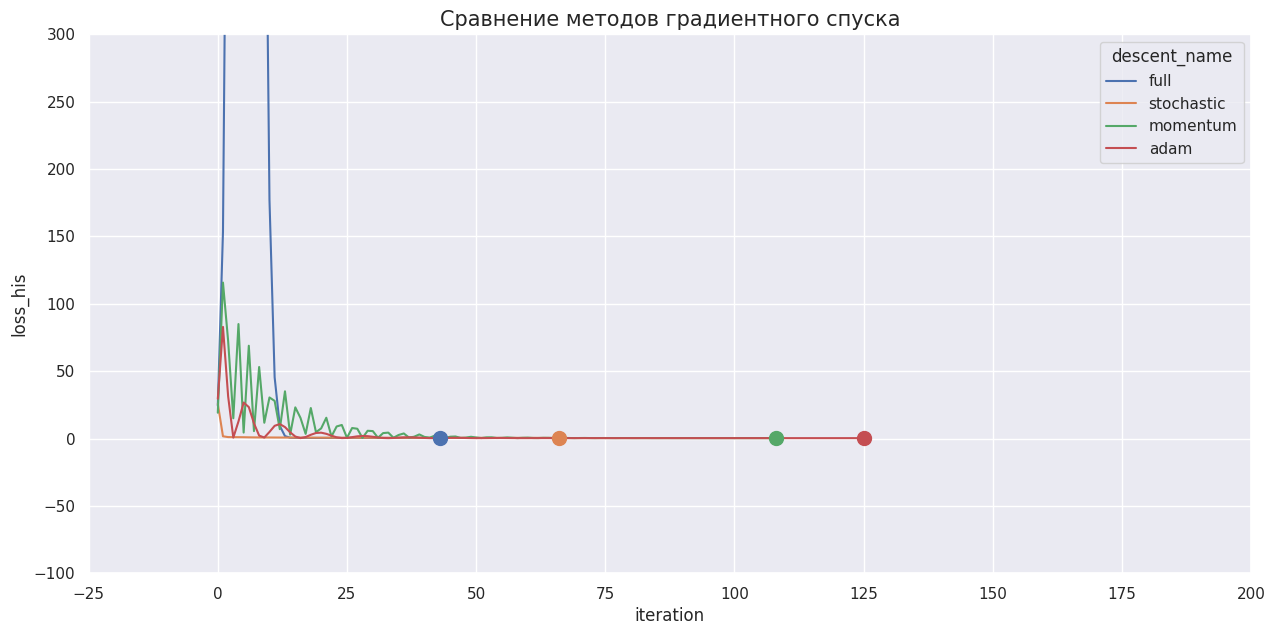

In [115]:
loss_his = res['loss_history'].apply(pd.Series).stack().reset_index(level=1)
loss_his.columns = ['iteration', 'loss_his']

loss_his = loss_his.join(res[['descent_name']], how='left')

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Сравнение методов градиентного спуска', fontsize=15)
sns.lineplot(data=loss_his,
             x='iteration',
             y='loss_his',
             hue='descent_name')

palette = sns.color_palette(None, len(loss_his['descent_name'].unique()))
descent_colors = dict(zip(loss_his['descent_name'].unique(), palette))

for descent_name in loss_his['descent_name'].unique():
    descent_data = loss_his[loss_his['descent_name'] == descent_name]
    last_point = descent_data.iloc[-1]
    plt.plot(last_point['iteration'], last_point['loss_his'], 'o', color=descent_colors[descent_name], markersize=10)

plt.ylim(-100, 300)
plt.xlim(-25, 200)
plt.show()

In [116]:
res

descent_name   best_lr  mse_train  mse_test  r2_train   r2_test  iterations  \
0         full  0.774264   0.365873  0.361685  0.699364  0.701953          44   
1   stochastic  0.215443   0.476015  0.473386  0.608861  0.609906          67   
2     momentum  0.774264   0.281810  0.275274  0.768438  0.773160         109   
3         adam  2.782559   0.263454  0.258800  0.783521  0.786736         126   

                                        loss_history  
0  [24.26240275605703, 153.3401608896637, 611.109...  
1  [25.76611049770174, 1.6278270461355284, 1.0461...  
2  [19.14100310785276, 115.722501015572, 72.34411...  
3  [29.508697525816203, 82.81067078059125, 31.248...

****

Как и ожидалось, 'full' спуск сходится быстрее всего и с большими ошибками в начале!\
Потом сходится 'stochastic' спуск и у него ошибка сглаживается  раньше всех!\
Затем идет 'momentum' спуск с затуханием ошибки лучше чем у полного, но хуже чем у остальных двух!\
Ну и самым последним сходится 'adam' c лучшими показателями в mse и в r2, но соответсвенно с большим количеством итераций!  


****


## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [120]:
from time import time

batch_sizes = np.arange(5, 500, 10)
result = pd.DataFrame(columns=['batch_size',
                               'mean_time',
                               'mean_iterations'])
descent_name = 'stochastic'
lamb = 0.215443
k = 10

for i, bs in enumerate(batch_sizes):
    time_sec = []
    iteration = []

    descent_config =  {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'batch_size' : bs, 'lambda_': lamb}}

    for j in range(k):
        model = LinearRegression(descent_config=descent_config)

        start_time = time()
        model.fit(X_train, y_train)
        end_time = time()
        diff_time = end_time - start_time

        time_sec.append(diff_time)
        iteration.append(len(model.loss_history))


    result.loc[i] = [bs,
                     np.mean(time_sec),
                     np.mean(iteration)]

In [121]:
result

batch_size  mean_time  mean_iterations
0          5.0   0.982303            134.5
1         15.0   0.541456            120.6
2         25.0   0.613309            104.9
3         35.0   0.389792             89.8
4         45.0   0.345243             77.5
5         55.0   0.436196             67.2
6         65.0   0.276816             61.8
7         75.0   0.275188             63.6
8         85.0   0.272246             61.8
9         95.0   0.339692             56.7
10       105.0   0.294347             55.5
11       115.0   0.245562             55.1
12       125.0   0.222115             51.1
13       135.0   0.214392             48.9
14       145.0   0.261081             43.4
15       155.0   0.269500             45.2
16       165.0   0.193330             43.9
17       175.0   0.198584             46.3
18       185.0   0.191500             43.0
19       195.0   0.204311             46.1
20       205.0   0.327896             46.1
21       215.0   0.202996             42.1
22       225.0   0.186050             43.4
23       235.0   0.183621             42.0
24       245.0   0.173141             38.4
25       255.0   0.187574             41.1
26       265.0   0.254268             38.1
27       275.0   0.242876             40.1
28       285.0   0.187111             41.9
29       295.0   0.176763             39.3
30       305.0   0.182008             41.2
31       315.0   0.173463             39.0
32       325.0   0.226333             41.4
33       335.0   0.294739             40.9
34       345.0   0.195581             43.3
35       355.0   0.192063             43.2
36       365.0   0.173188             39.4
37       375.0   0.171662             38.6
38       385.0   0.177362             40.2
39       395.0   0.324240             38.9
40       405.0   0.167118             38.8
41       415.0   0.177297             41.2
42       425.0   0.179016             41.1
43       435.0   0.160048             35.9
44       445.0   0.160294             36.0
45       455.0   0.215661             36.3
46       465.0   0.254422             34.8
47       475.0   0.160303             36.5
48       485.0   0.174214             39.8
49       495.0   0.164576             37.5

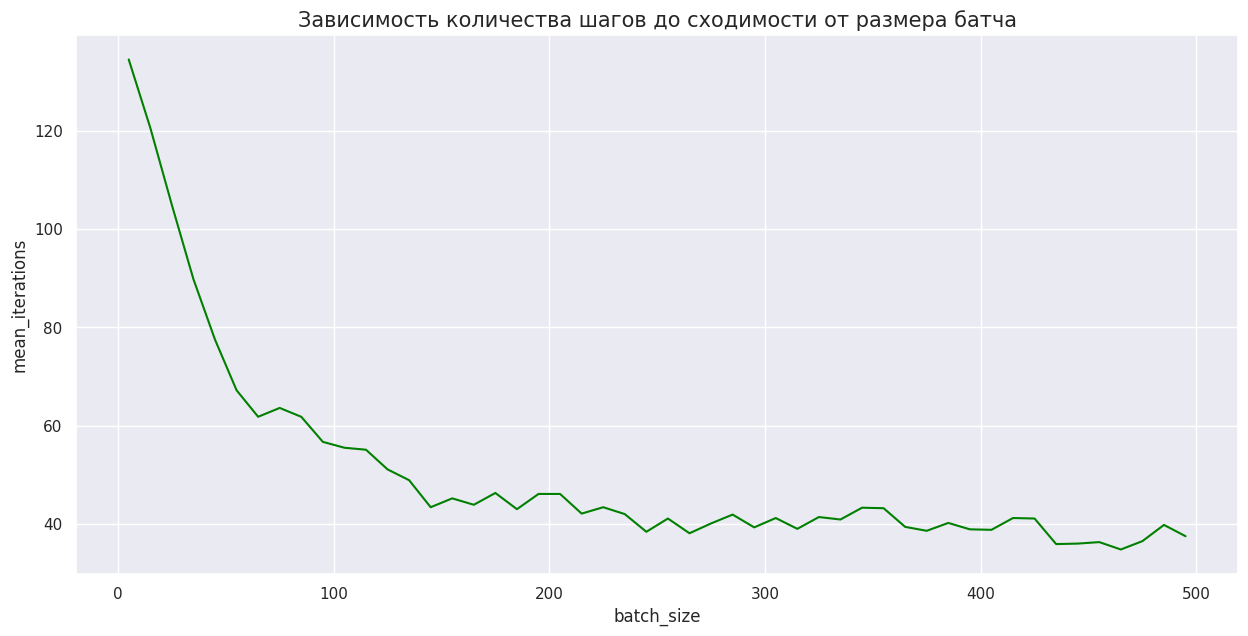

In [127]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Зависимость количества шагов до сходимости от размера батча', fontsize=15)
sns.lineplot(data=result,
             ax=ax,
             x='batch_size',
             y='mean_iterations',
             color='green')
plt.show()

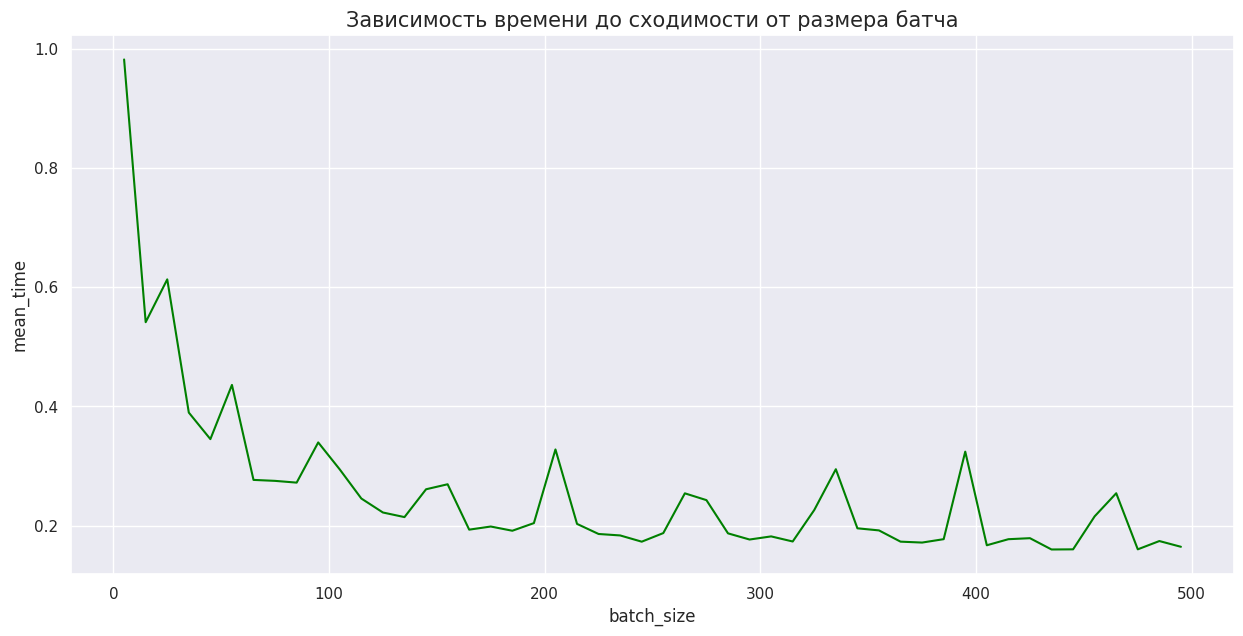

In [124]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Зависимость времени до сходимости от размера батча', fontsize=15)
sns.lineplot(data=result,
             ax=ax,
             x='batch_size',
             y='mean_time',
             color='green')
plt.show()

****
С ростом размера батча требуется меньше времени и количества итераций до сходимости!\
Но во времени есть пару парадоксальных случаев, когда размер батча большой, но времени требуется резко больше(например, 210, 340, 390 размеры)!
****


## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96435550/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [133]:
# Сделаем все в одной табличке, так будет удобнее для меня
lamb = np.logspace(-4, 1, 10)
mumb = np.logspace(-4, 0, 5)
reg_not = [0, 1]
index = 0
res_reg = pd.DataFrame(columns=['descent_name', 'best_lr', 'best_mu', 'reg', 'mse_train', 'mse_test',
                            'r2_train', 'r2_test', 'iterations', 'loss_history'])

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
  # Выполним все методы градиентов в цикле

  desc_loss = []
  desc_loss_lm_mu = {}
  for reg_or_not in reg_not:
    if reg_or_not == 1:
      index += 1
      for lr in lamb:
        for mu in mumb:
          # Найдем лучшую лямбда по лог сетке
          desc_condig = {'descent_name': descent_name, 'regularized': True, 'kwargs': {'dimension': X_train.shape[1], 'mu': mu, 'lambda_': lr}}
          # desc_type = get_descent(desc_config)
          model = LinearRegression(descent_config=desc_condig)
          model.fit(X_train, y_train)
          desc_loss_lm_mu[(lr, mu)] = (model.calc_loss(X_valid, y_valid))

      lr_best, mu_best = min(desc_loss_lm_mu, key=desc_loss_lm_mu.get)
      desc_condig = {'descent_name': descent_name, 'regularized': True, 'kwargs': {'dimension': X_train.shape[1], 'mu': mu_best, 'lambda_': lr_best}}
      model = LinearRegression(descent_config=desc_condig)
      model.fit(X_train, y_train)

      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      mse_train = model.calc_loss(X_train, y_train)
      mse_test = model.calc_loss(X_test, y_test)

      r2_train = r2_score(y_train, y_pred_train)
      r2_test = r2_score(y_test, y_pred_test)

      res_reg.loc[index] = [descent_name, lr_best, mu_best, reg_or_not, mse_train, mse_test,
                    r2_train, r2_test, len(model.loss_history), model.loss_history]
    else:
      index += 1
      for lr in lamb:
        # Найдем лучшую лямбда по лог сетке
        desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr}}
        # desc_type = get_descent(desc_config)
        model = LinearRegression(descent_config=desc_condig)
        model.fit(X_train, y_train)
        desc_loss.append(model.calc_loss(X_valid, y_valid))

      lr_best = lamb[np.argmin(desc_loss)]
      desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'lambda_': lr_best}}
      model = LinearRegression(descent_config=desc_condig)
      model.fit(X_train, y_train)

      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      mse_train = model.calc_loss(X_train, y_train)
      mse_test = model.calc_loss(X_test, y_test)

      r2_train = r2_score(y_train, y_pred_train)
      r2_test = r2_score(y_test, y_pred_test)

      res_reg.loc[index] = [descent_name, lr_best, 0, reg_or_not, mse_train, mse_test,
                    r2_train, r2_test, len(model.loss_history), model.loss_history]


In [134]:
res_reg

descent_name   best_lr  best_mu  reg  mse_train  mse_test  r2_train  \
1         full  0.774264   0.0000    0   0.372615  0.359076  0.693824   
2         full  0.774264   0.1000    1   0.307821  0.299301  0.747065   
3   stochastic  0.215443   0.0000    0   0.486415  0.480134  0.600315   
4   stochastic  0.774264   0.1000    1   0.338688  0.330776  0.721702   
5     momentum  0.774264   0.0000    0   0.281532  0.273669  0.768667   
6     momentum  0.774264   0.0100    1   0.276446  0.266744  0.772846   
7         adam  0.774264   0.0000    0   0.263342  0.258468  0.783614   
8         adam  2.782559   0.0001    1   0.263287  0.257473  0.783659   

    r2_test  iterations                                       loss_history  
1  0.704103          45  [18.922539284299667, 111.45966698421654, 440.1...  
2  0.753361         195  [26.610360852251198, 155.24258469127008, 645.1...  
3  0.604346          73  [26.66907463703145, 4.228212279167515, 2.84190...  
4  0.727424         301  [19.24103360252462, 111.94416759825202, 452.02...  
5  0.774483         113  [28.994198601206072, 185.0465910844806, 114.07...  
6  0.780190         184  [32.932337146143325, 222.03957913773434, 136.3...  
7  0.787009         134  [18.503713976469363, 0.8014818465099038, 4.953...  
8  0.787829         301  [25.557486239607577, 91.76061329857595, 29.738...

<ipython-input-138-ea391c54092b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))


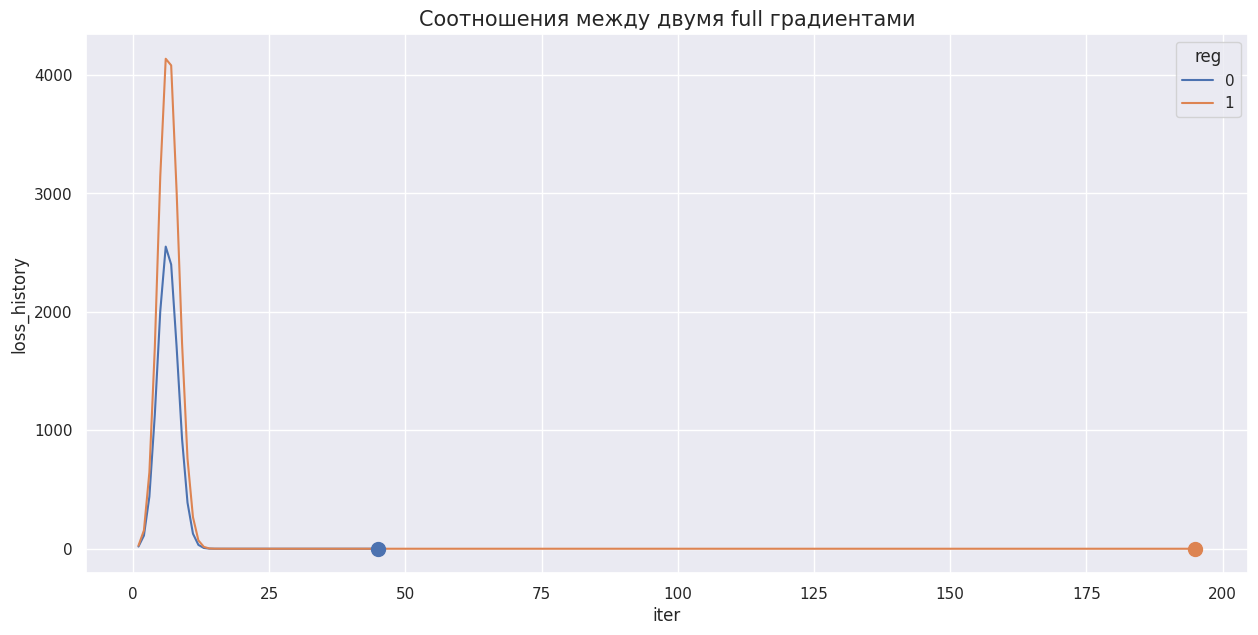

In [138]:
data_full = res_reg[res_reg['descent_name'] == 'full']
data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))
data_full = data_full.explode(column=['loss_history', 'iter'])
data_full['iter'] = pd.to_numeric(data_full['iter'])

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Соотношения между двумя full градиентами', fontsize=15)
sns.lineplot(data=data_full,
             x='iter',
             y='loss_history',
             hue='reg')

for reg in data_full['reg'].unique():
    subset = data_full[data_full['reg'] == reg]
    last_point = subset.iloc[-1]
    plt.scatter(last_point['iter'], last_point['loss_history'], color=sns.color_palette()[reg], s=100, zorder=5)

plt.show()


<ipython-input-139-d107a7e09d69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))


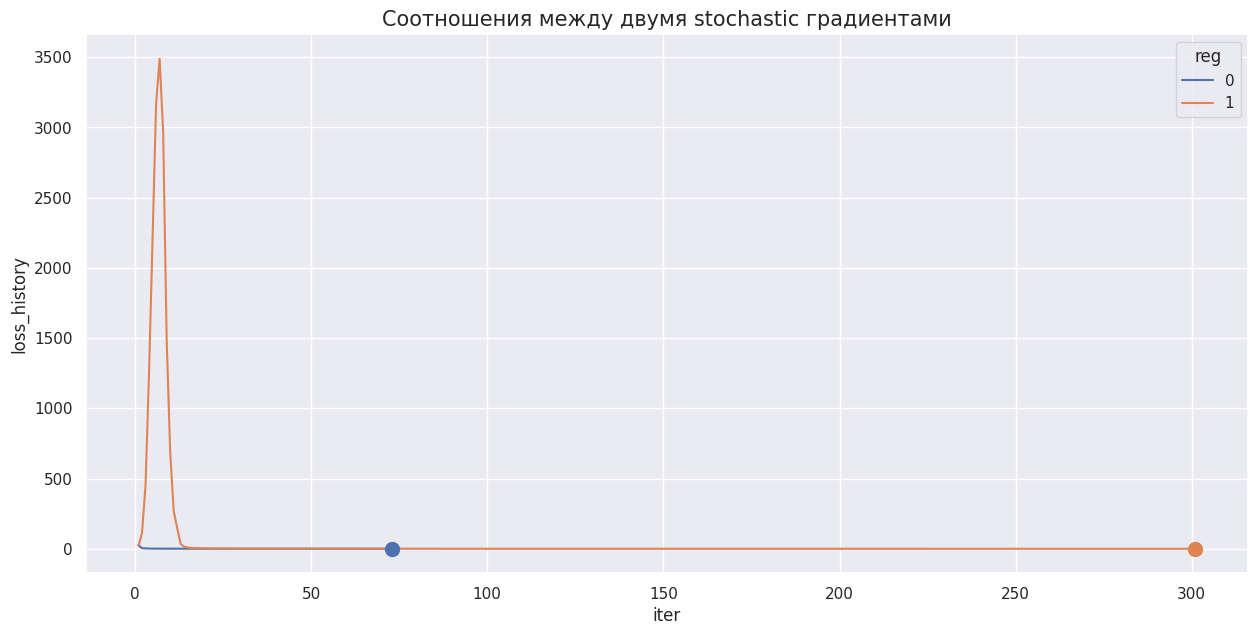

In [139]:
data_full = res_reg[res_reg['descent_name'] == 'stochastic']
data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))
data_full = data_full.explode(column=['loss_history', 'iter'])
data_full['iter'] = pd.to_numeric(data_full['iter'])

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Соотношения между двумя stochastic градиентами', fontsize=15)
sns.lineplot(data=data_full,
             x='iter',
             y='loss_history',
             hue='reg')

for reg in data_full['reg'].unique():
    subset = data_full[data_full['reg'] == reg]
    last_point = subset.iloc[-1]
    plt.scatter(last_point['iter'], last_point['loss_history'], color=sns.color_palette()[reg], s=100, zorder=5)

plt.show()

<ipython-input-140-c07d148c7296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))


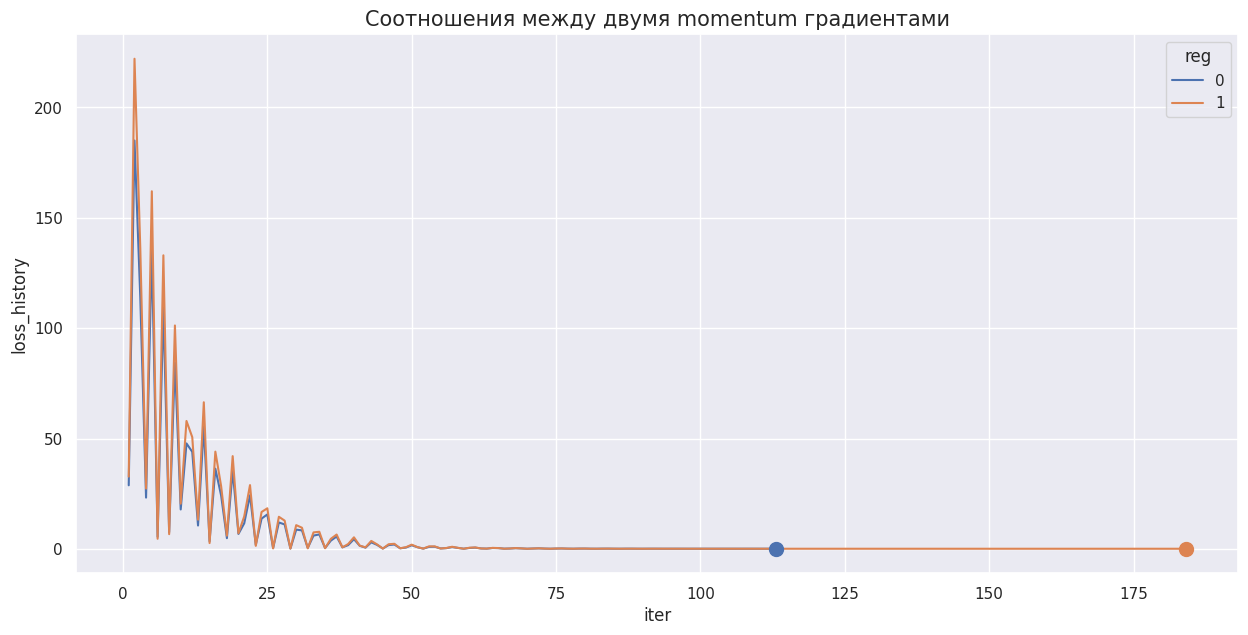

In [140]:
data_full = res_reg[res_reg['descent_name'] == 'momentum']
data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))
data_full = data_full.explode(column=['loss_history', 'iter'])
data_full['iter'] = pd.to_numeric(data_full['iter'])

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Соотношения между двумя momentum градиентами', fontsize=15)
sns.lineplot(data=data_full,
             x='iter',
             y='loss_history',
             hue='reg')

for reg in data_full['reg'].unique():
    subset = data_full[data_full['reg'] == reg]
    last_point = subset.iloc[-1]
    plt.scatter(last_point['iter'], last_point['loss_history'], color=sns.color_palette()[reg], s=100, zorder=5)

plt.show()

<ipython-input-141-d31d5fccd945>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))


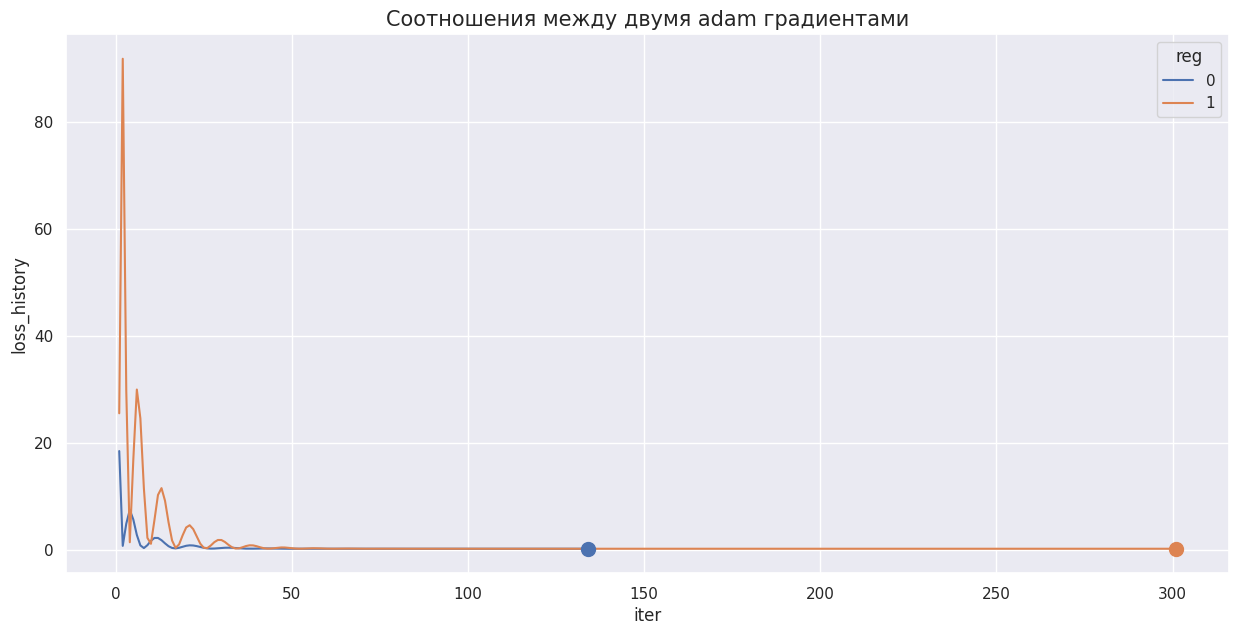

In [141]:
data_full = res_reg[res_reg['descent_name'] == 'adam']
data_full['iter'] = data_full['loss_history'].apply(lambda x: list(range(1, len(x) + 1)))
data_full = data_full.explode(column=['loss_history', 'iter'])
data_full['iter'] = pd.to_numeric(data_full['iter'])

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Соотношения между двумя adam градиентами', fontsize=15)
sns.lineplot(data=data_full,
             x='iter',
             y='loss_history',
             hue='reg')

for reg in data_full['reg'].unique():
    subset = data_full[data_full['reg'] == reg]
    last_point = subset.iloc[-1]
    plt.scatter(last_point['iter'], last_point['loss_history'], color=sns.color_palette()[reg], s=100, zorder=5)

plt.show()

****
Во всех случаях введения регуляризатора ситуация схожая!\
А именно, увеличивается число итераций до сходимости, а ошибка падает.
****

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

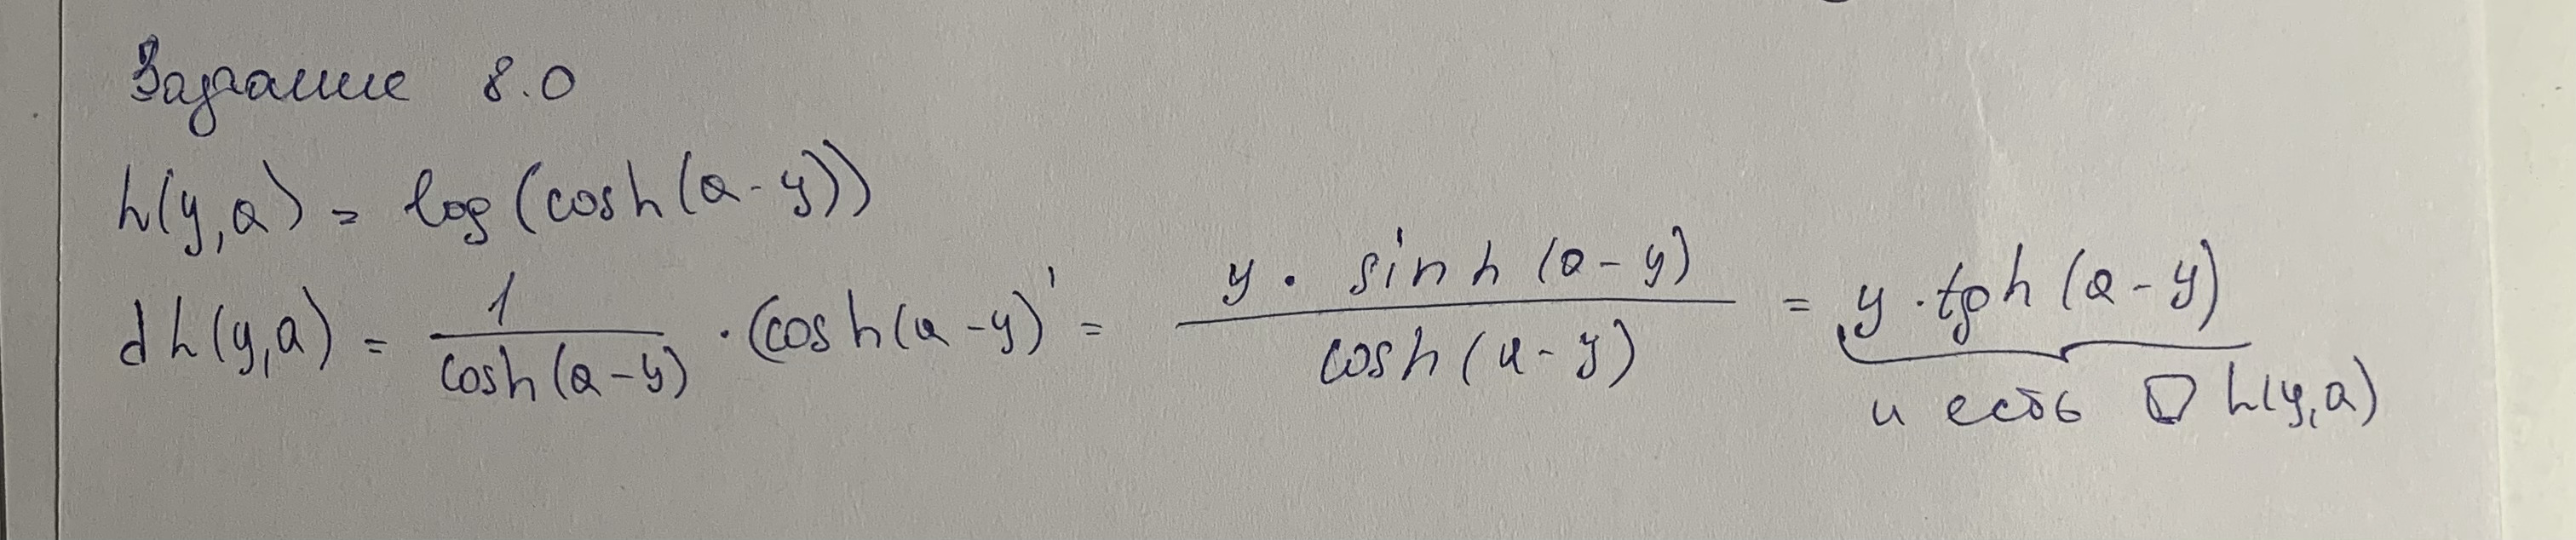

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [142]:
from descents import get_descent, LossFunction
from linear_regression import LinearRegression

In [143]:
lamb = np.logspace(-4, 1, 10)
last_res = pd.DataFrame(columns=['descent_name', 'best_lr', 'mse_train', 'mse_test',
                                'r2_train', 'r2_test', 'iterations', 'loss_history'])

for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
  # Выполним все методы градиентов в цикле

  desc_loss = []
  for lr in lamb:
    # Найдем лучшую лямбда по лог сетке
    desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'loss_function' : LossFunction.LogCosh, 'lambda_': lr}}
    # desc_type = get_descent(desc_config)
    model = LinearRegression(descent_config=desc_condig)
    model.fit(X_train, y_train)
    desc_loss.append(model.calc_loss(X_valid, y_valid))

  lr_best = lamb[np.argmin(desc_loss)]
  desc_condig = {'descent_name': descent_name, 'kwargs': {'dimension': X_train.shape[1], 'loss_function' : LossFunction.LogCosh, 'lambda_': lr_best}}
  model = LinearRegression(descent_config=desc_condig)
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  mse_train = model.calc_loss(X_train, y_train)
  mse_test = model.calc_loss(X_test, y_test)

  r2_train = r2_score(y_train, y_pred_train)
  r2_test = r2_score(y_test, y_pred_test)

  last_res.loc[i] = [descent_name, lr_best, mse_train, mse_test,
                r2_train, r2_test, len(model.loss_history), model.loss_history]


In [144]:
last_res

descent_name    best_lr  mse_train  mse_test  r2_train   r2_test  \
0         full  10.000000   0.126171  0.122842  0.748811  0.752738   
1   stochastic   2.782559   0.149877  0.148089  0.698217  0.698429   
2     momentum   2.782559   0.116090  0.112093  0.769170  0.775311   
3         adam  10.000000   0.109773  0.106235  0.782763  0.786983   

   iterations                                       loss_history  
0         231  [4.2706918507963065, 17.67457683438513, 1.0601...  
1         301  [5.031309042067409, 0.7452734685025292, 1.3916...  
2         126  [4.710617446528909, 1.207962314781522, 3.78268...  
3         151  [4.326447670136128, 43.77955541792349, 41.6415...

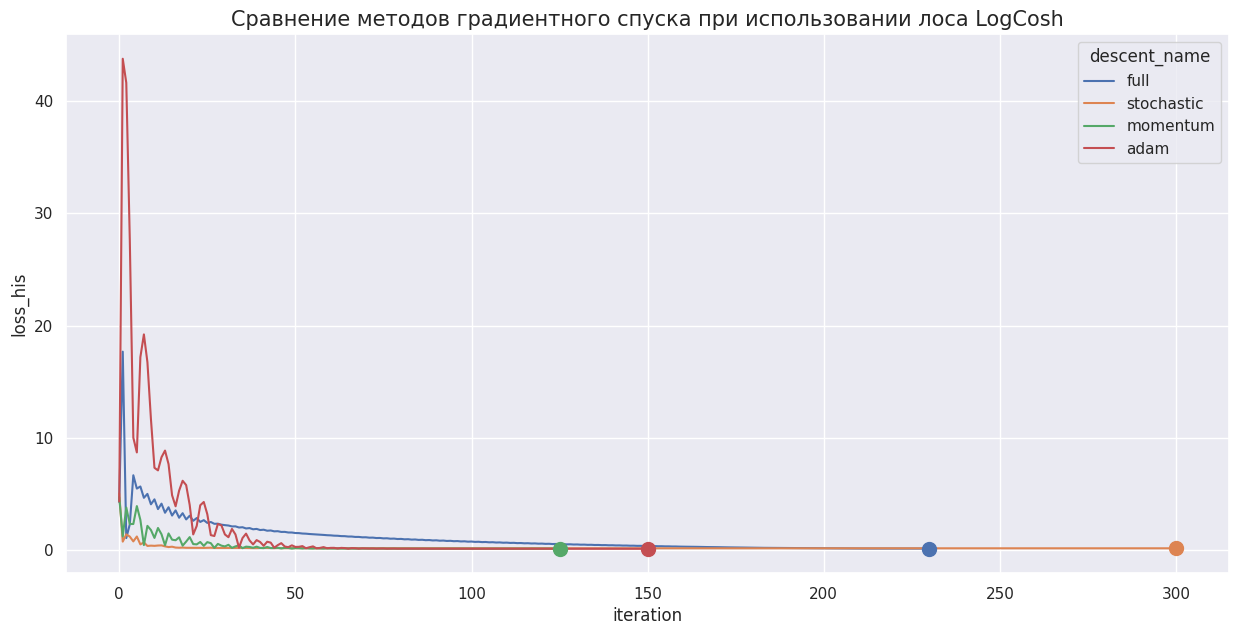

In [146]:
loss_his = last_res['loss_history'].apply(pd.Series).stack().reset_index(level=1)
loss_his.columns = ['iteration', 'loss_his']

loss_his = loss_his.join(last_res[['descent_name']], how='left')

fig, ax = plt.subplots(figsize=(15, 7))
ax.set_title('Сравнение методов градиентного спуска при использовании лоса LogCosh', fontsize=15)
sns.lineplot(data=loss_his,
             x='iteration',
             y='loss_his',
             hue='descent_name')

palette = sns.color_palette(None, len(loss_his['descent_name'].unique()))
descent_colors = dict(zip(loss_his['descent_name'].unique(), palette))

for descent_name in loss_his['descent_name'].unique():
    descent_data = loss_his[loss_his['descent_name'] == descent_name]
    last_point = descent_data.iloc[-1]
    plt.plot(last_point['iteration'], last_point['loss_his'], 'o', color=descent_colors[descent_name], markersize=10)

# plt.ylim(-100, 300)
# plt.xlim(-25, 200)
plt.show()

****
*   Все они сходятся за большое количество итераций чем те, что в пятом задании
*   А также лосс уменьшился минимум в два раза
****


### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: